In [2]:
import time
import qiskit
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization.bloch import Bloch
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram

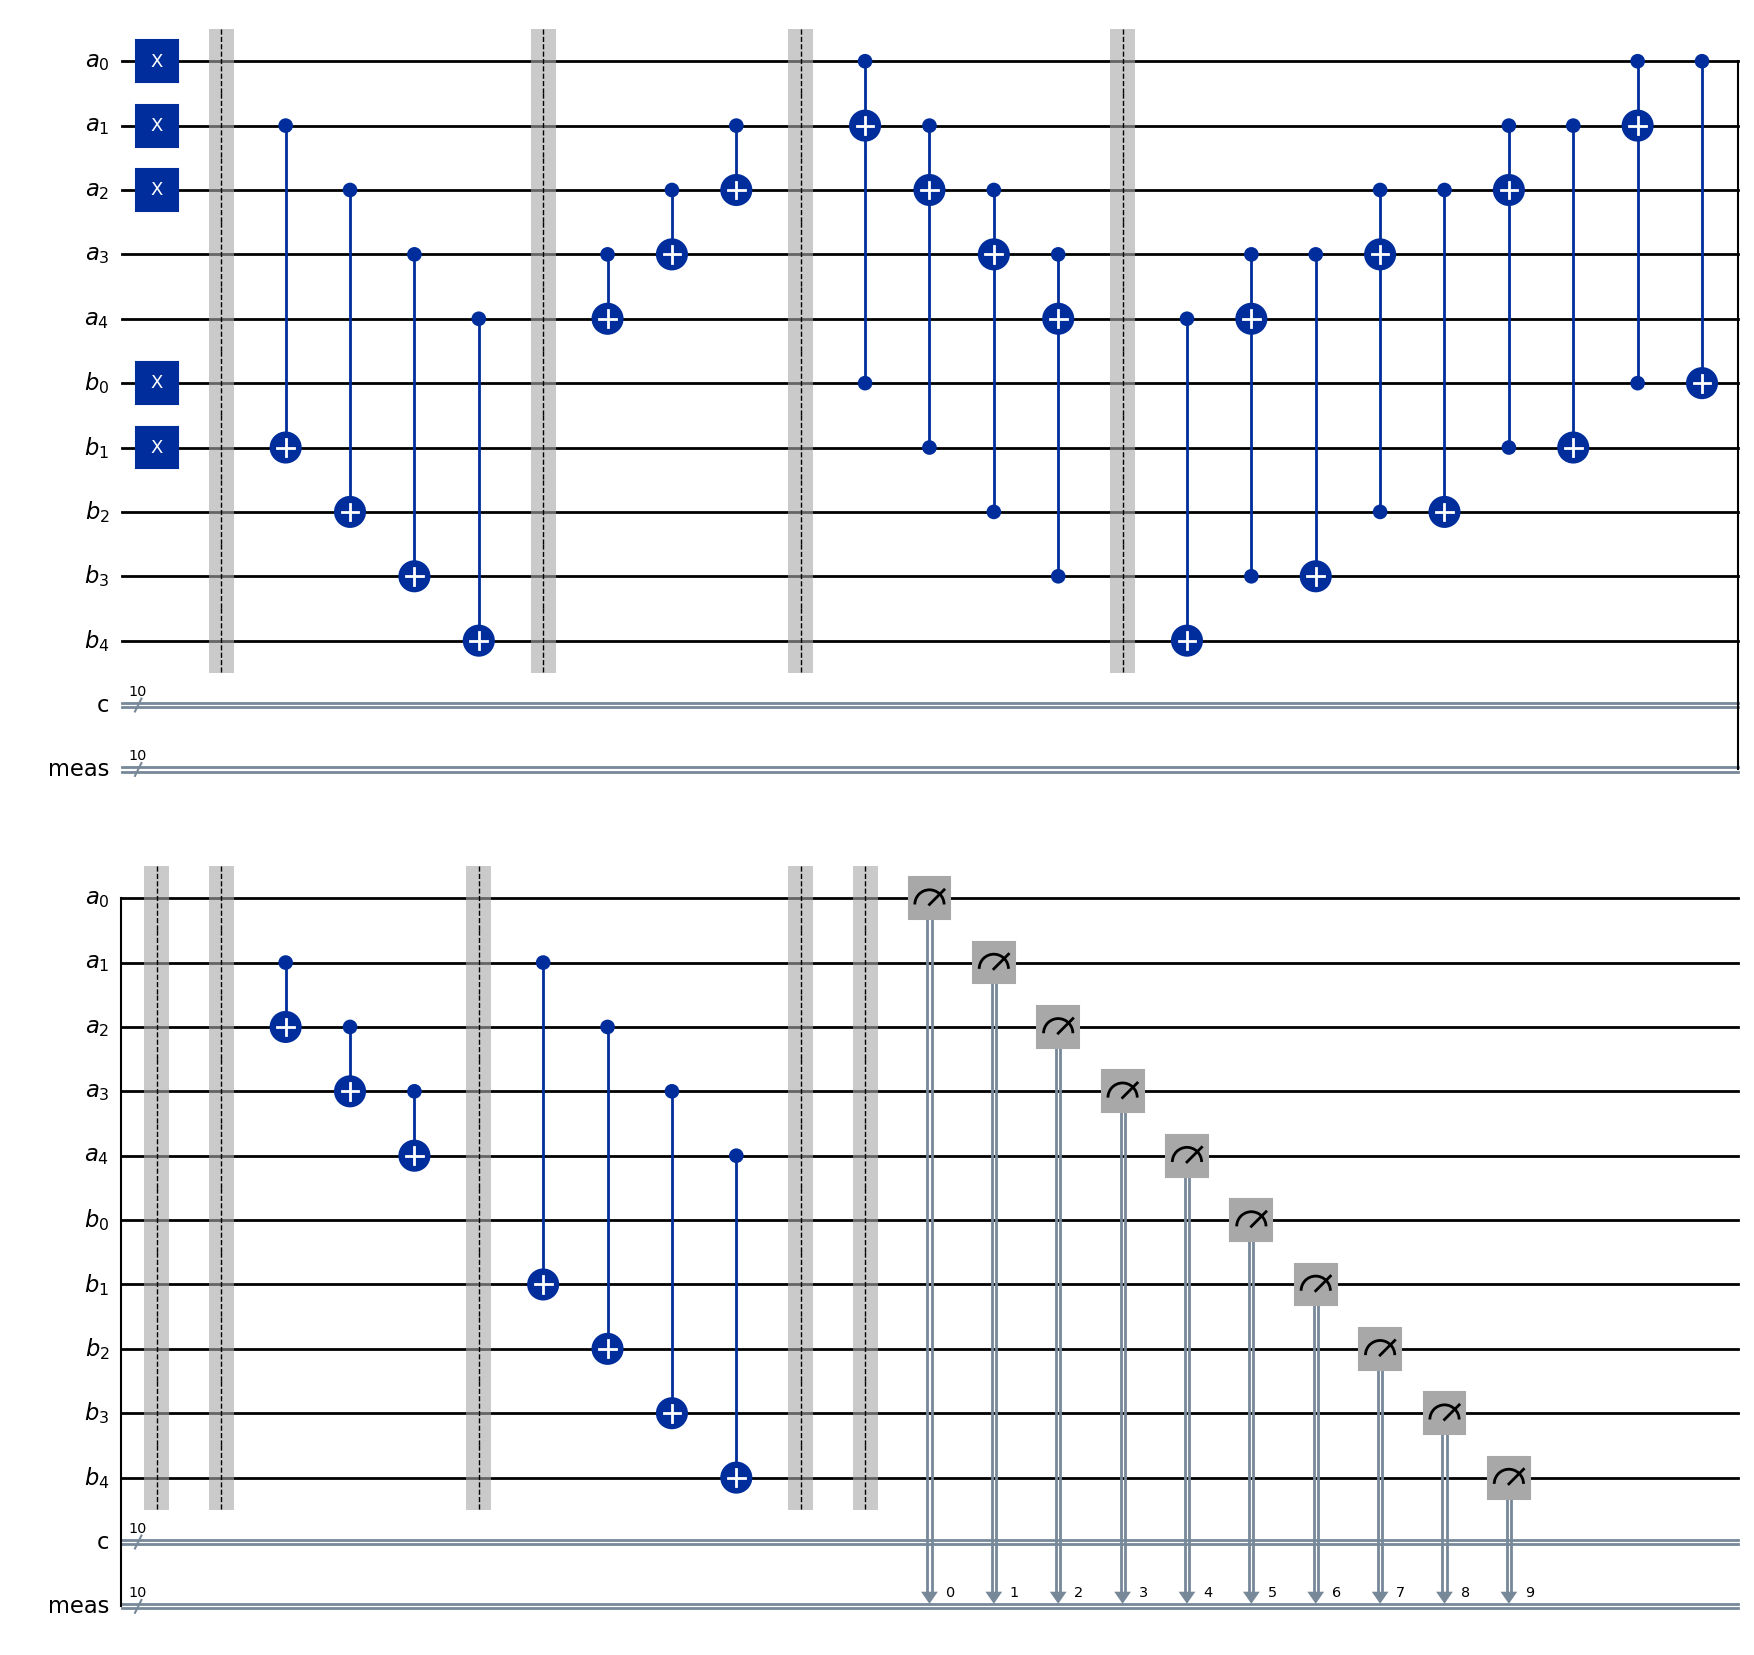

In [31]:
a = QuantumRegister(5, "a") # |00111>
b = QuantumRegister(5,"b")  # |00011>
c = ClassicalRegister(10,"c")
adder = QuantumCircuit(a,b,c)

adder.x([0,1,2])
adder.x([5,6])
adder.barrier()
for i in range(1,5):
    adder.cx(i,i+5)

adder.barrier()
for i in range(3,0,-1):
    adder.cx(i,i+1)
adder.barrier()

for i in range(1,5):
    adder.ccx(i-1,i+4,i)
adder.barrier()

adder.cx(4,4+5)

for i in range(4,0,-1):      # Peres gate implementation
    adder.ccx(i-1,i+4,i)
    adder.cx(i-1,i+4)
adder.barrier()

adder.barrier()
for i in range(2,5):
    adder.cx(i-1,i)
adder.barrier()

for i in range(1,5):
    adder.cx(i,i+5)
adder.barrier()

adder.measure_all()
adder.draw('mpl')

In [32]:
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_adder = transpile(adder, simulator)
result = simulator.run(compiled_adder, shots=10000).result()

result.get_counts()

{'0101000111 0000000000': 10000}

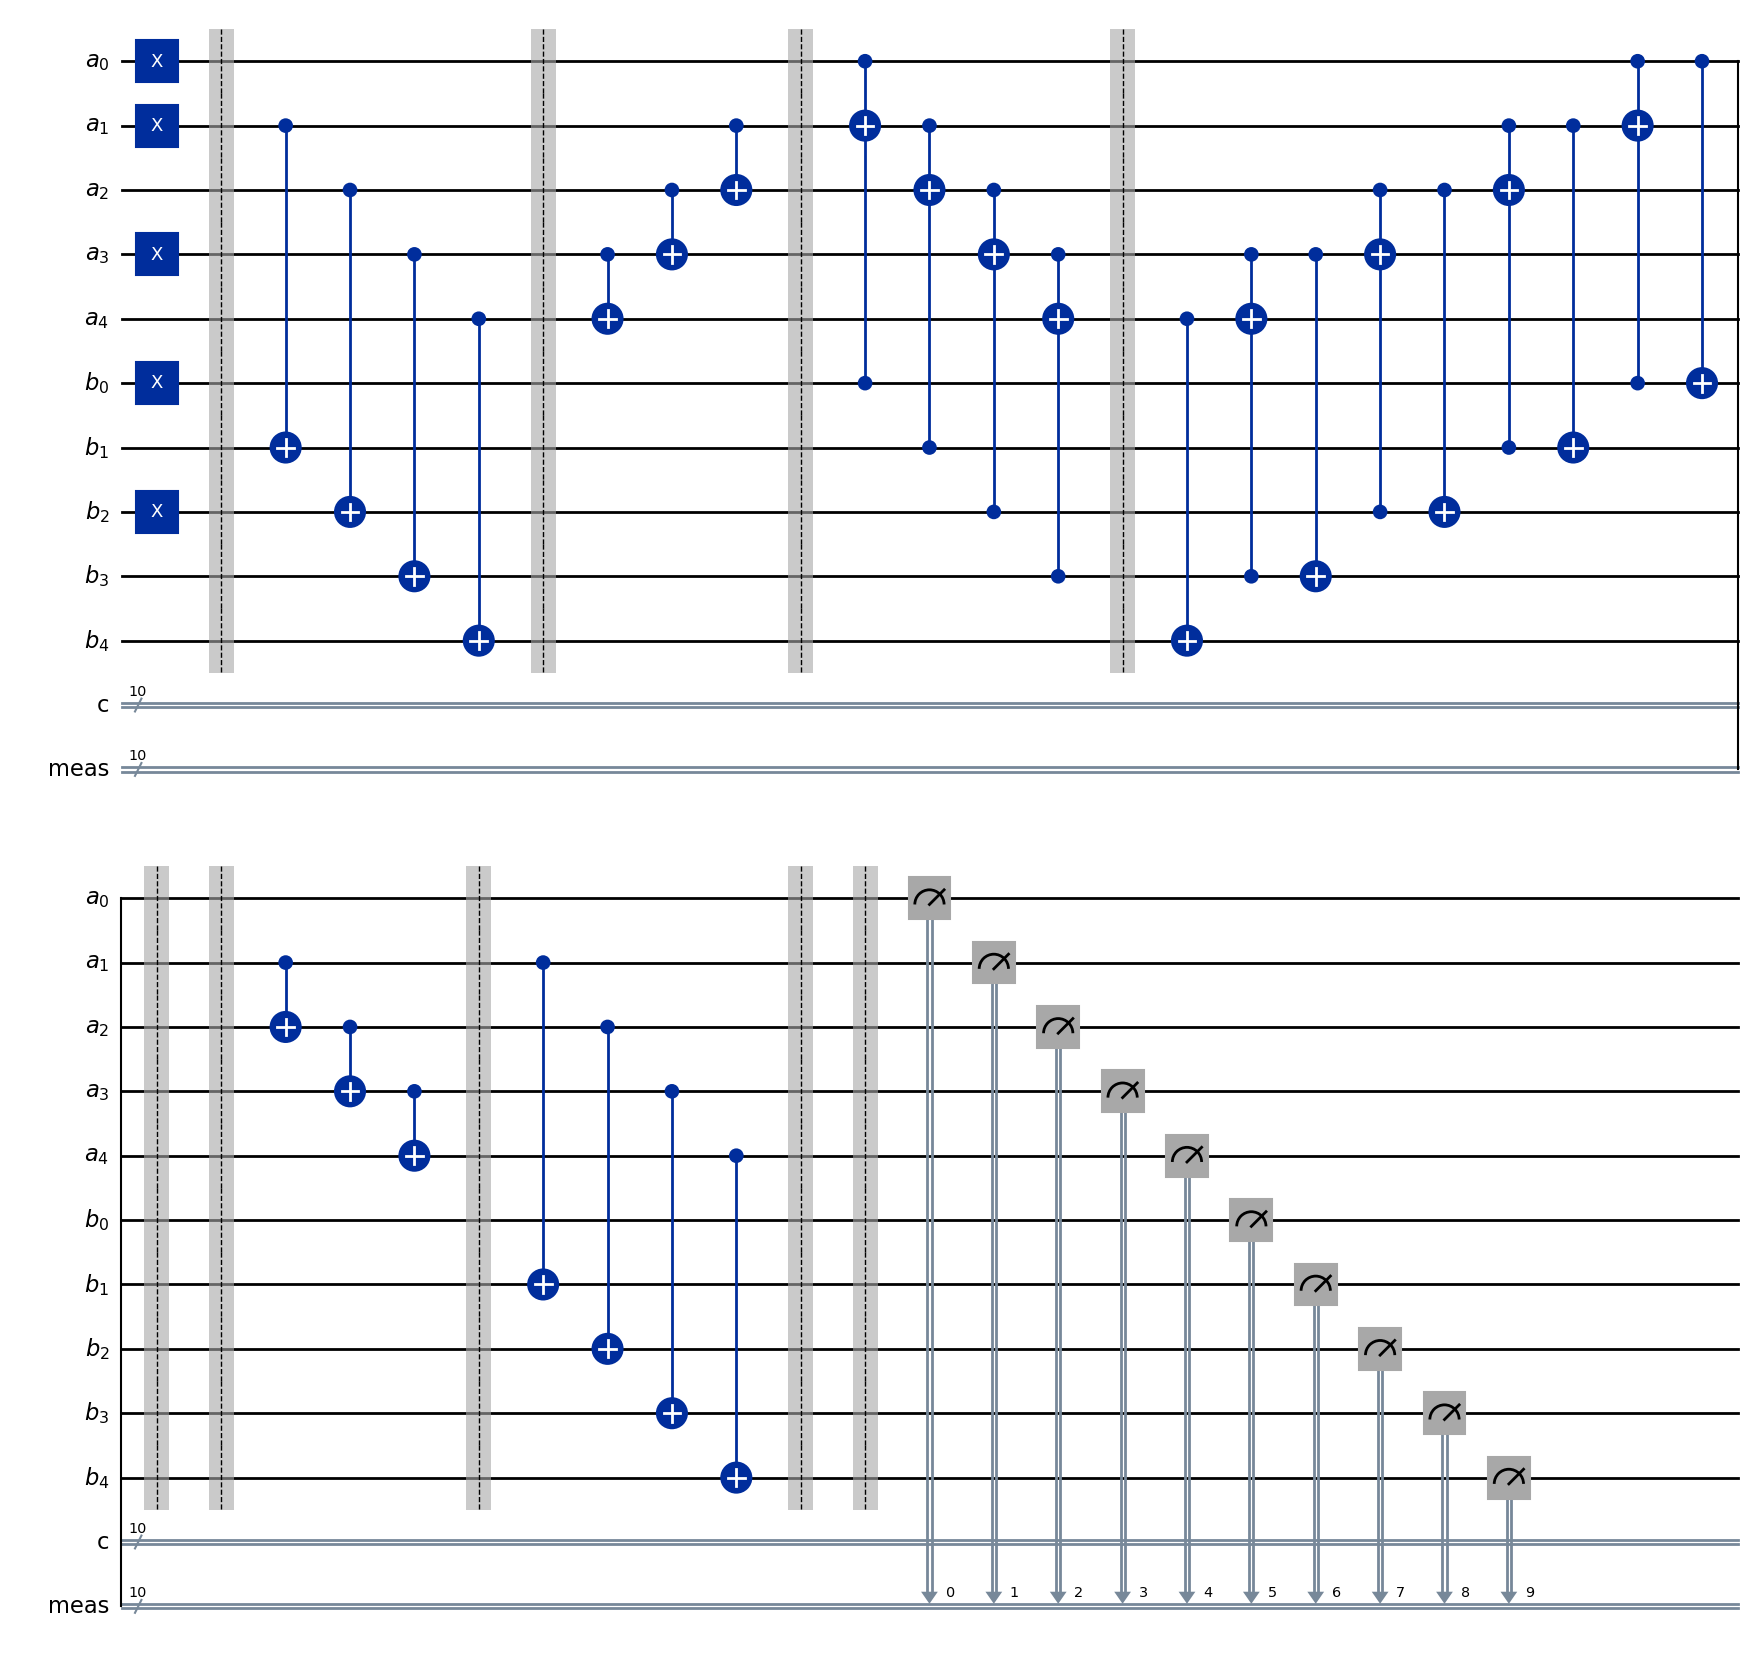

In [33]:
a = QuantumRegister(5, "a") # |01011>
b = QuantumRegister(5,"b")  # |00101>
c = ClassicalRegister(10,"c")
adder = QuantumCircuit(a,b,c)

adder.x([0,1,3])
adder.x([5,7])
adder.barrier()
for i in range(1,5):
    adder.cx(i,i+5)

adder.barrier()
for i in range(3,0,-1):
    adder.cx(i,i+1)
adder.barrier()

for i in range(1,5):
    adder.ccx(i-1,i+4,i)
adder.barrier()

adder.cx(4,4+5)

for i in range(4,0,-1):      # Peres gate implementation
    adder.ccx(i-1,i+4,i)
    adder.cx(i-1,i+4)
adder.barrier()

adder.barrier()
for i in range(2,5):
    adder.cx(i-1,i)
adder.barrier()

for i in range(1,5):
    adder.cx(i,i+5)
adder.barrier()

adder.measure_all()
adder.draw('mpl')

In [34]:
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_adder = transpile(adder, simulator)
result = simulator.run(compiled_adder, shots=10000).result()

result.get_counts()

{'1000001011 0000000000': 10000}

# Shift Operations

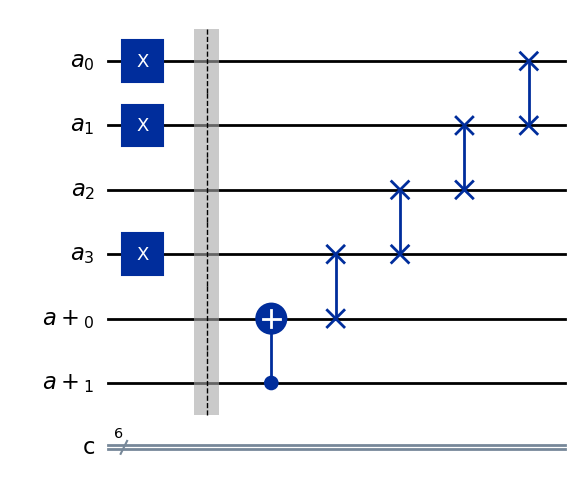

In [ ]:
# m = 6 system
a = QuantumRegister(4, "a") # |1011> =1+2+8 = 11 
axu = QuantumRegister(2,"a+")  # |001011>
c = ClassicalRegister(6,"c")
shift = QuantumCircuit(a,axu,c)
shift.x([0,1,3])
shift.barrier()
shift.cx(axu[1],axu[0])
for i in range(4,0,-1):
    shift.swap(i,i-1)
shift.draw('mpl')

In [ ]:
shift.measure_all()
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_shift = transpile(shift, simulator)
result_shift = simulator.run(compiled_shift, shots=10000).result()

result_shift.get_counts()
# |001011> -> |010110>

{'010110 000000': 10000}

# Subtractor

In [ ]:
a = QuantumRegister(3, "a") # |101>  # 5
b = QuantumRegister(3,"b")  # |011>  # 3
a_axu=QuantumRegister(2,"a+")
b_axu=QuantumRegister(2,"b+")
c = ClassicalRegister(10,"c")
sub = QuantumCircuit(a,a_axu,b,b_axu,c)

sub.x(a[2])
sub.x(a[0])

sub.x(b[0])
sub.x(b[1])
sub.barrier()
# quantum encoding

# Subtractor

sub.x(a)
sub.barrier()
for i in range(1,5):
    sub.cx(i,i+5)

sub.barrier()
for i in range(3,0,-1):
    sub.cx(i,i+1)
sub.barrier()

for i in range(1,5):
    sub.ccx(i-1,i+4,i)
sub.barrier()

sub.cx(4,4+5)

for i in range(4,0,-1):      # Peres gate implementation
    sub.ccx(i-1,i+4,i)
    sub.cx(i-1,i+4)
sub.barrier()

sub.barrier()
for i in range(2,5):
    sub.cx(i-1,i)
sub.barrier()

for i in range(1,5):
    sub.cx(i,i+5)
sub.barrier()

sub.x(a)
sub.x(b)
sub.measure_all()



In [211]:
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_sub = transpile(sub, simulator)
result_sub = simulator.run(compiled_sub, shots=10000).result()

result_sub.get_counts()
# |101> - |011>  ( 5-3) = 2  
# pred = |101> , |010>

{'0001000101 0000000000': 10000}

# Matrix [[1,1],[1,-1]]

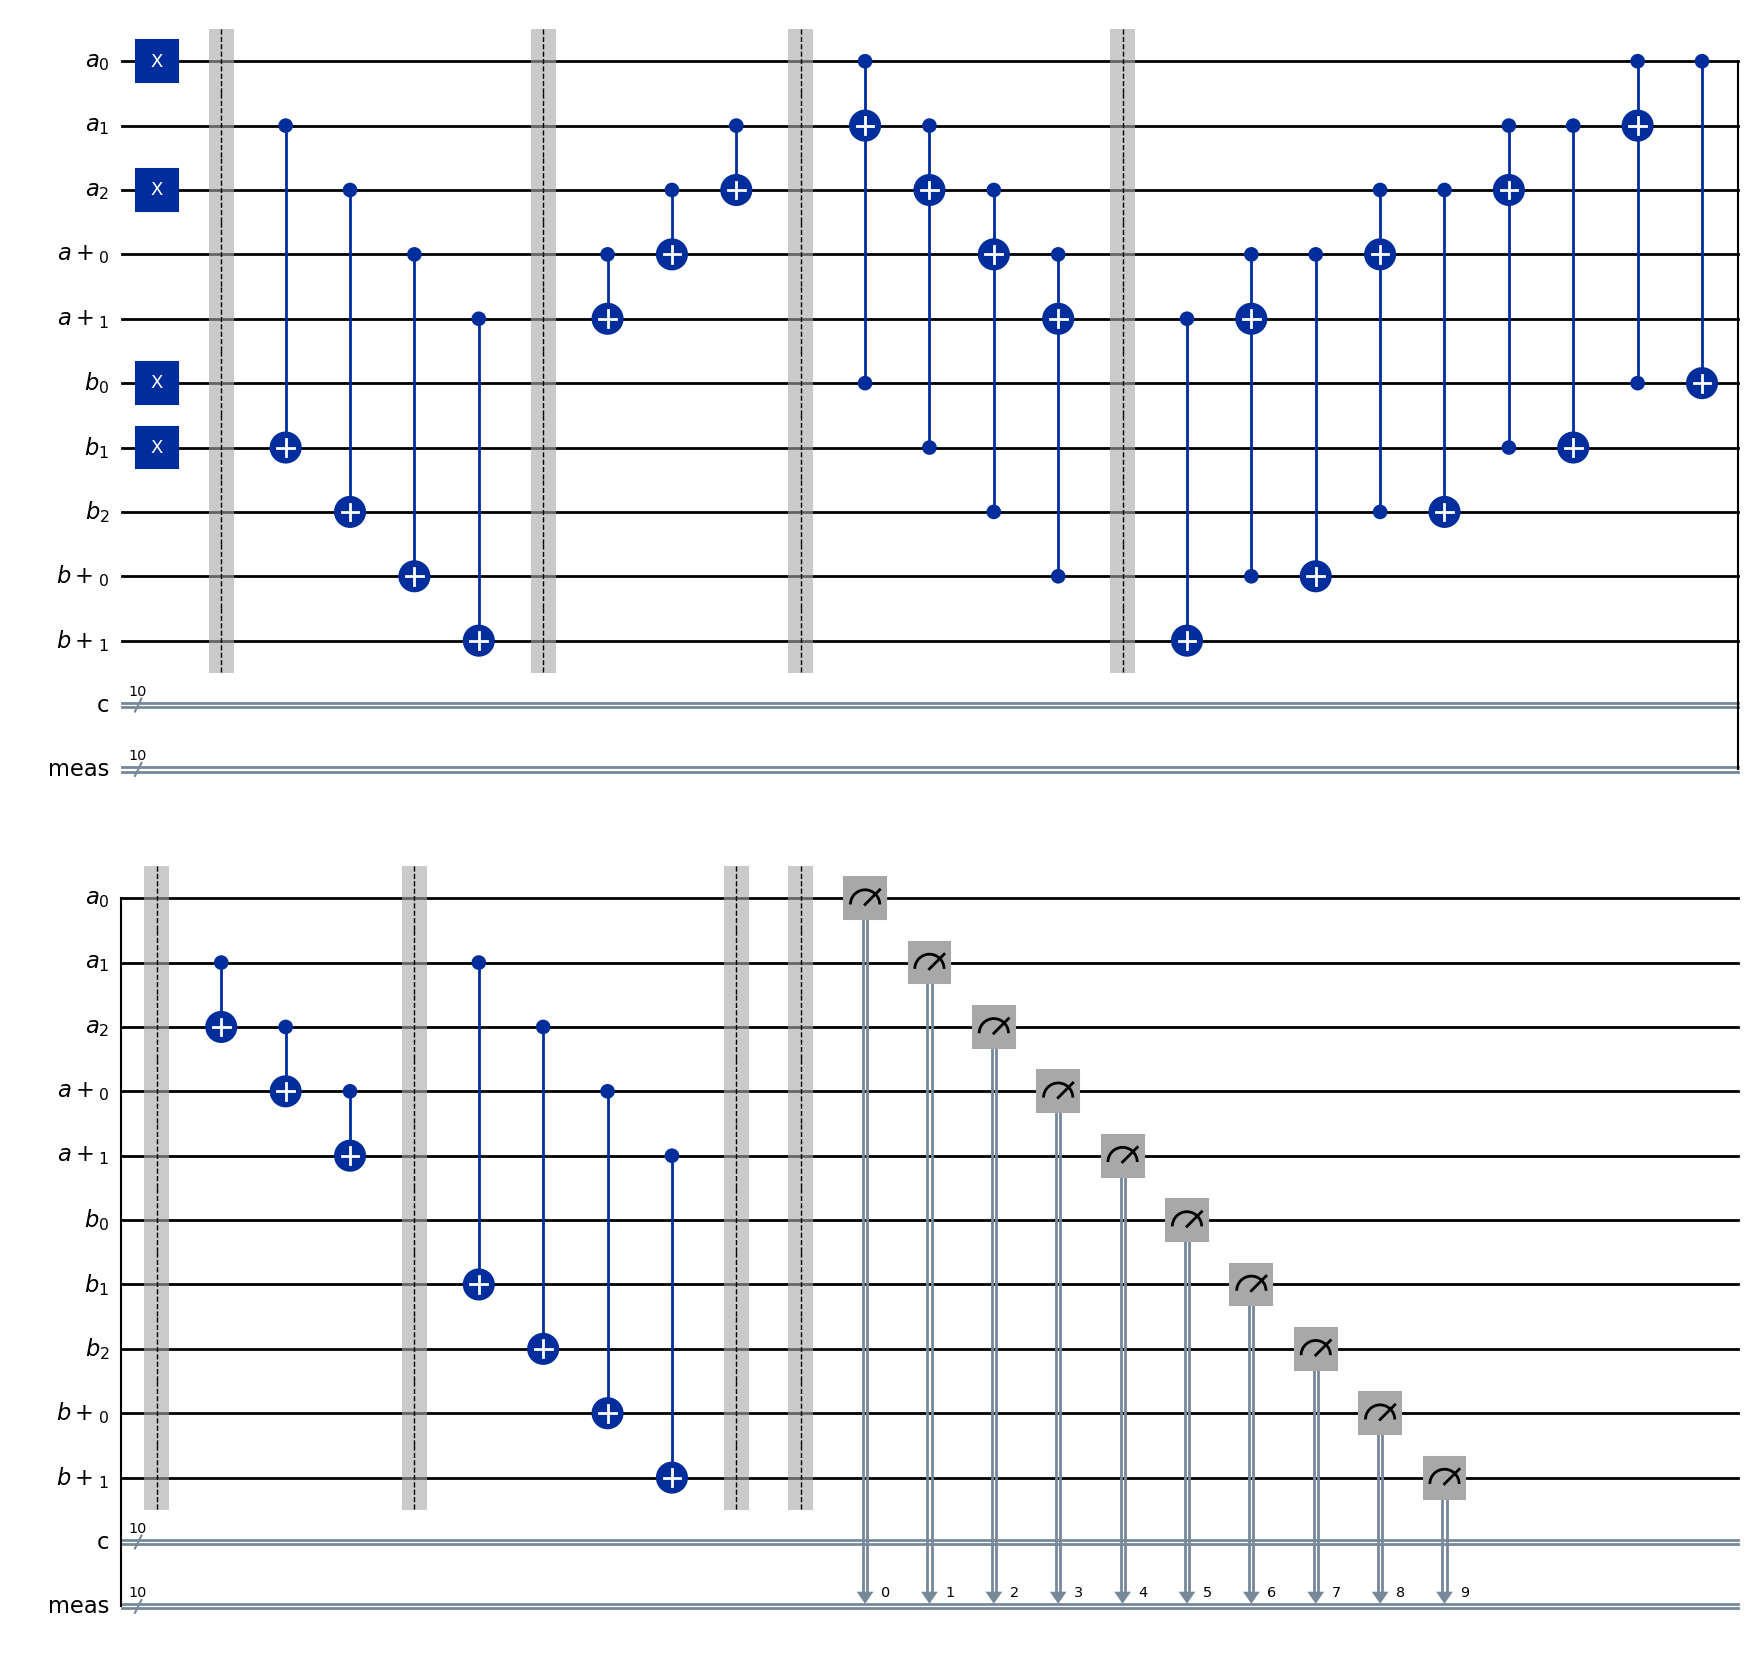

In [215]:
a = QuantumRegister(3, "a") # |101>  # 5
b = QuantumRegister(3,"b")  # |011>  # 3
a_axu=QuantumRegister(2,"a+")
b_axu=QuantumRegister(2,"b+")
c = ClassicalRegister(10,"c")
mat = QuantumCircuit(a,a_axu,b,b_axu,c)

mat.x(a[2])
mat.x(a[0])

mat.x(b[0])
mat.x(b[1])
mat.barrier()
# quantum encoding

# adder
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
for i in range(3,0,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i)
mat.barrier()
mat.cx(4,4+5)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i)
    mat.cx(i-1,i+4)
mat.barrier()
for i in range(2,5):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
'''
# Shift
mat.cx(b_axu[1],b_axu[0])
mat.swap(b_axu[0],b[2])
for i in range(2,0,-1):
    mat.swap(b[i],b[i-1])
mat.barrier()
# Subtractor
mat.x(a)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
for i in range(3,0,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i)
mat.barrier()
mat.cx(4,4+5)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i)
    mat.cx(i-1,i+4)
mat.barrier()
for i in range(2,5):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
mat.x(a)
mat.x(b)
'''
mat.measure_all()

mat.draw('mpl')

In [216]:
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_mat = transpile(mat, simulator)
result_mat = simulator.run(compiled_mat, shots=10000).result()

result_mat.get_counts()
# |101> - |011>  
# pred = |01000> , |00010>

{'0100000101 0000000000': 10000}

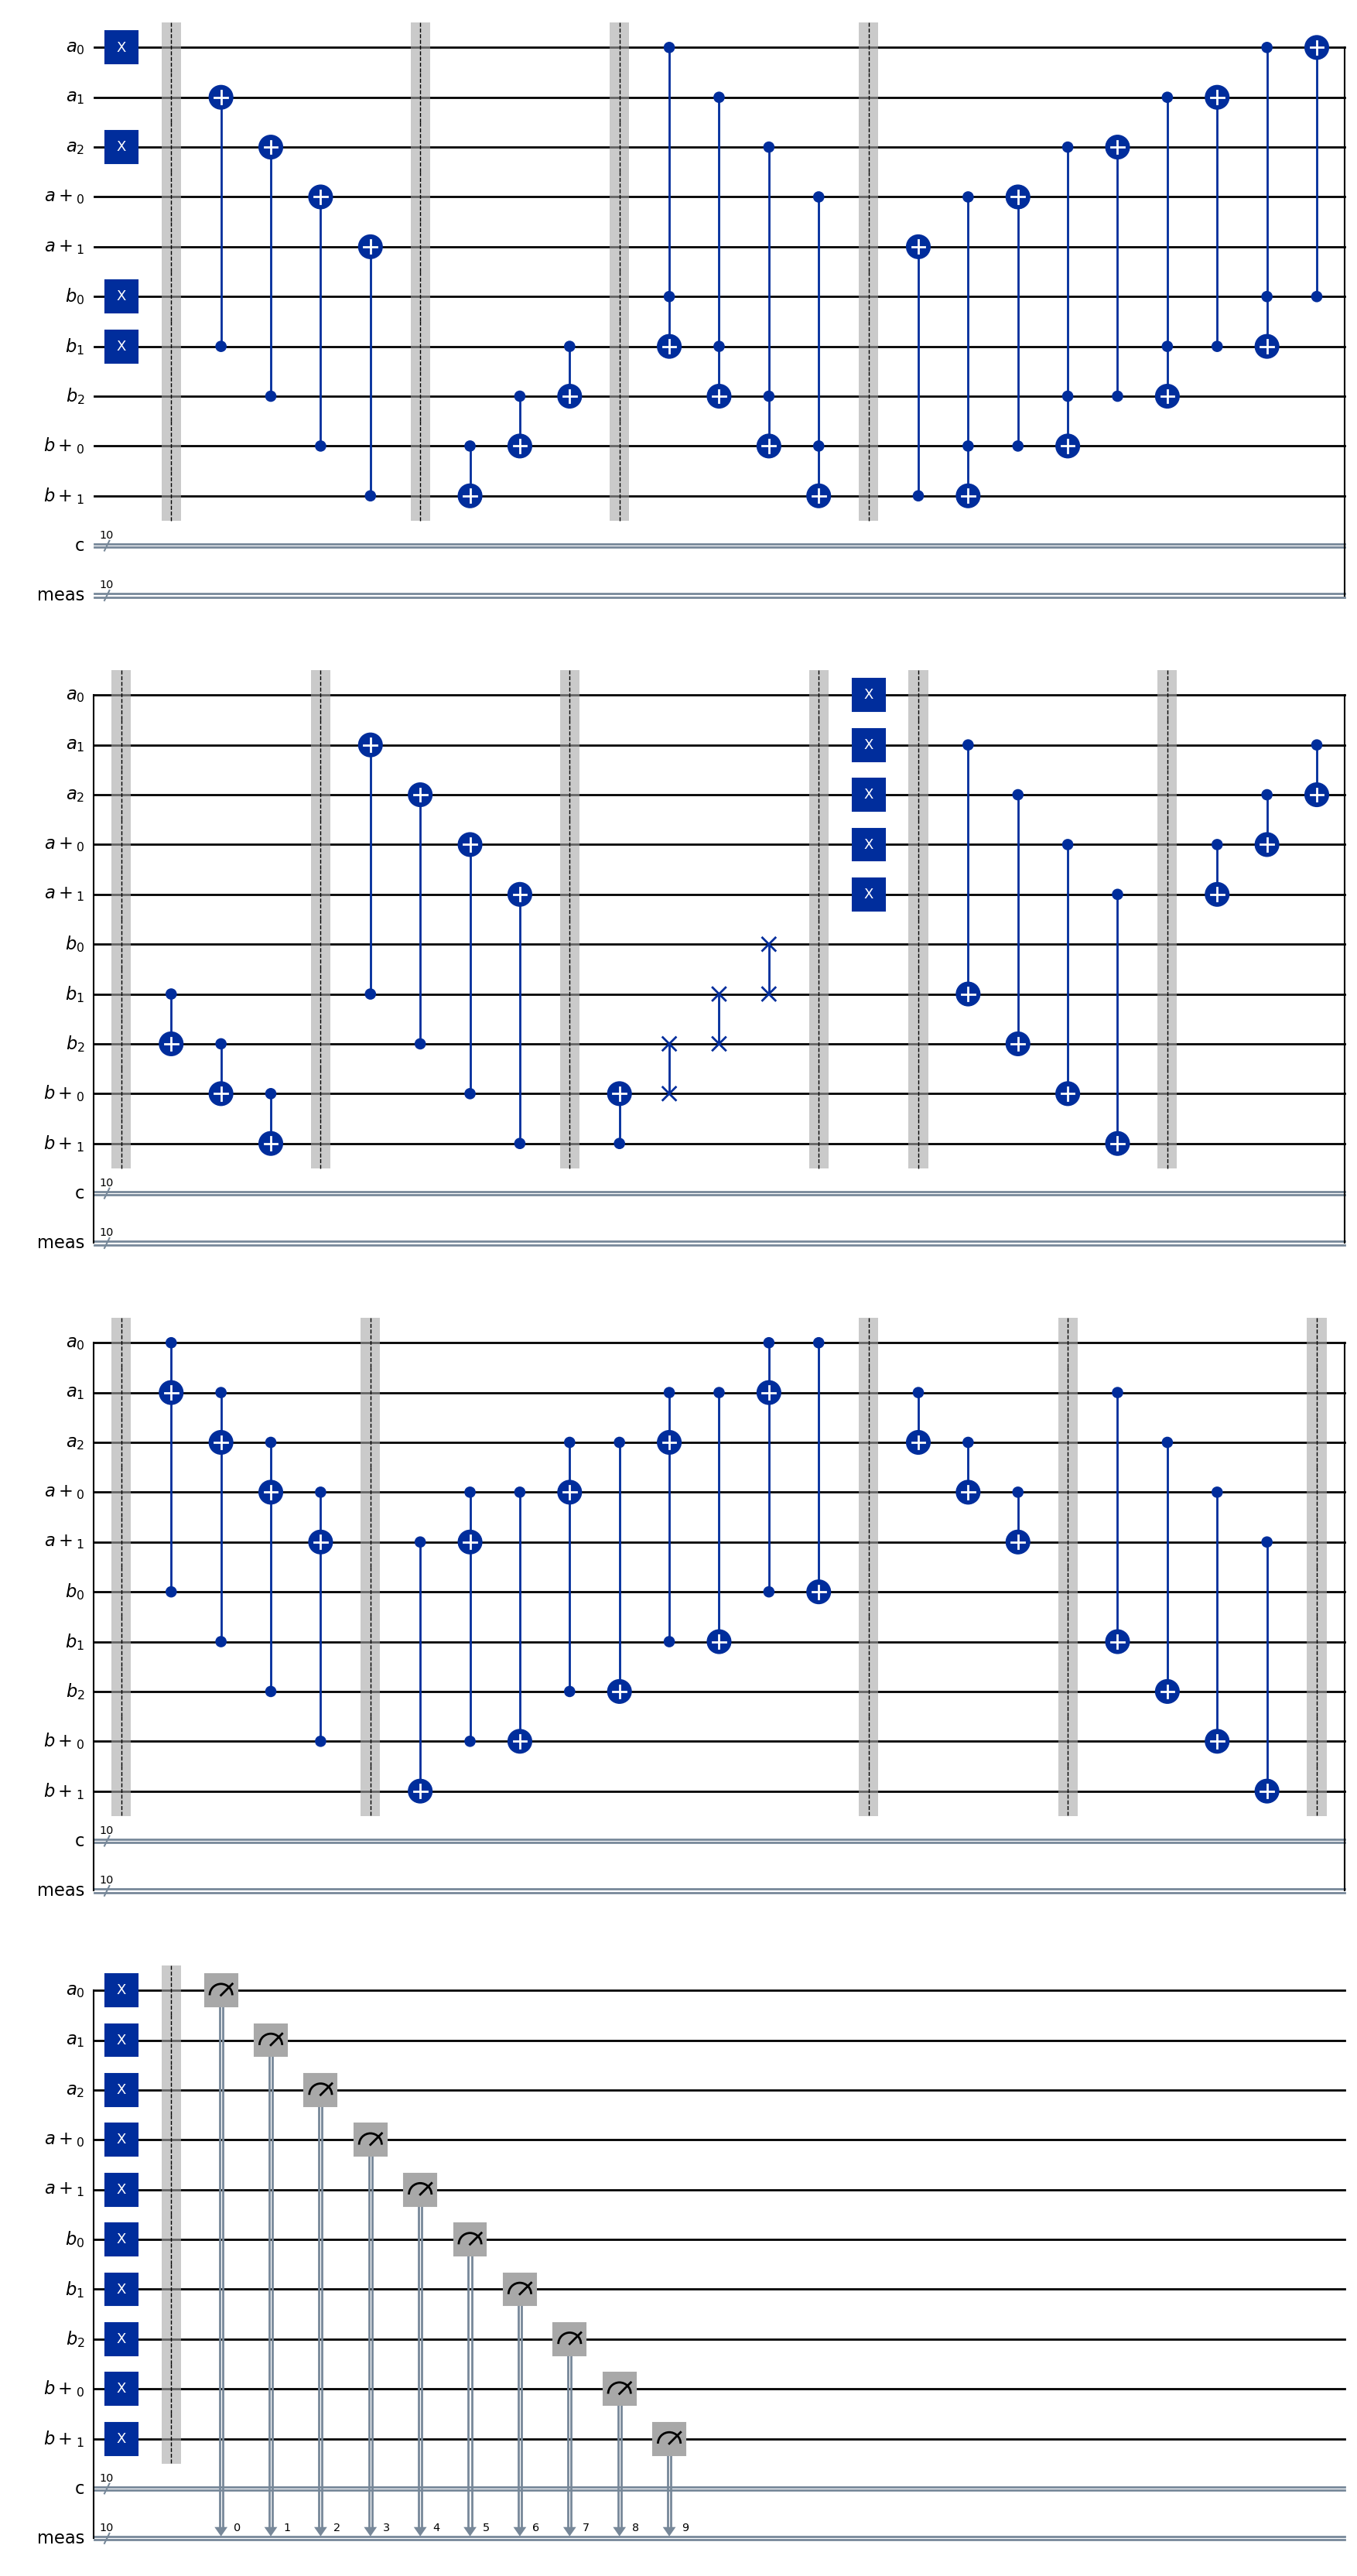

In [242]:
a = QuantumRegister(3, "a") # |101>  # 5
b = QuantumRegister(3,"b")  # |011>  # 3
a_axu=QuantumRegister(2,"a+")
b_axu=QuantumRegister(2,"b+")
c = ClassicalRegister(10,"c")
mat = QuantumCircuit(a,a_axu,b,b_axu,c)

mat.x(a[2])
mat.x(a[0])

mat.x(b[0])
mat.x(b[1])
mat.barrier()
# quantum encoding

# adder
for i in range(1,5):
    mat.cx(i+5,i)
mat.barrier()
for i in range(8,5,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i+5)
mat.barrier()
mat.cx(4+5,4)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i+5)
    mat.cx(i+4,i-1)

mat.barrier()
for i in range(7,10):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i+5,i)
mat.barrier()

# Shift
mat.cx(b_axu[1],b_axu[0])
mat.swap(b_axu[0],b[2])
for i in range(2,0,-1):
    mat.swap(b[i],b[i-1])
mat.barrier()

#Subtractor
mat.x(a)
mat.x(a_axu)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
for i in range(3,0,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i)
mat.barrier()
mat.cx(4,4+5)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i)
    mat.cx(i-1,i+4)
mat.barrier()
for i in range(2,5):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
mat.x(a)
mat.x(a_axu)
mat.x(b)
mat.x(b_axu)

mat.measure_all()
mat.draw('mpl')

In [243]:
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_mat = transpile(mat, simulator)
result_mat = simulator.run(compiled_mat, shots=10000).result()

result_mat.get_counts()
# |101> - |011>  
# pred = |01000> , |00010>

{'0001001000 0000000000': 10000}

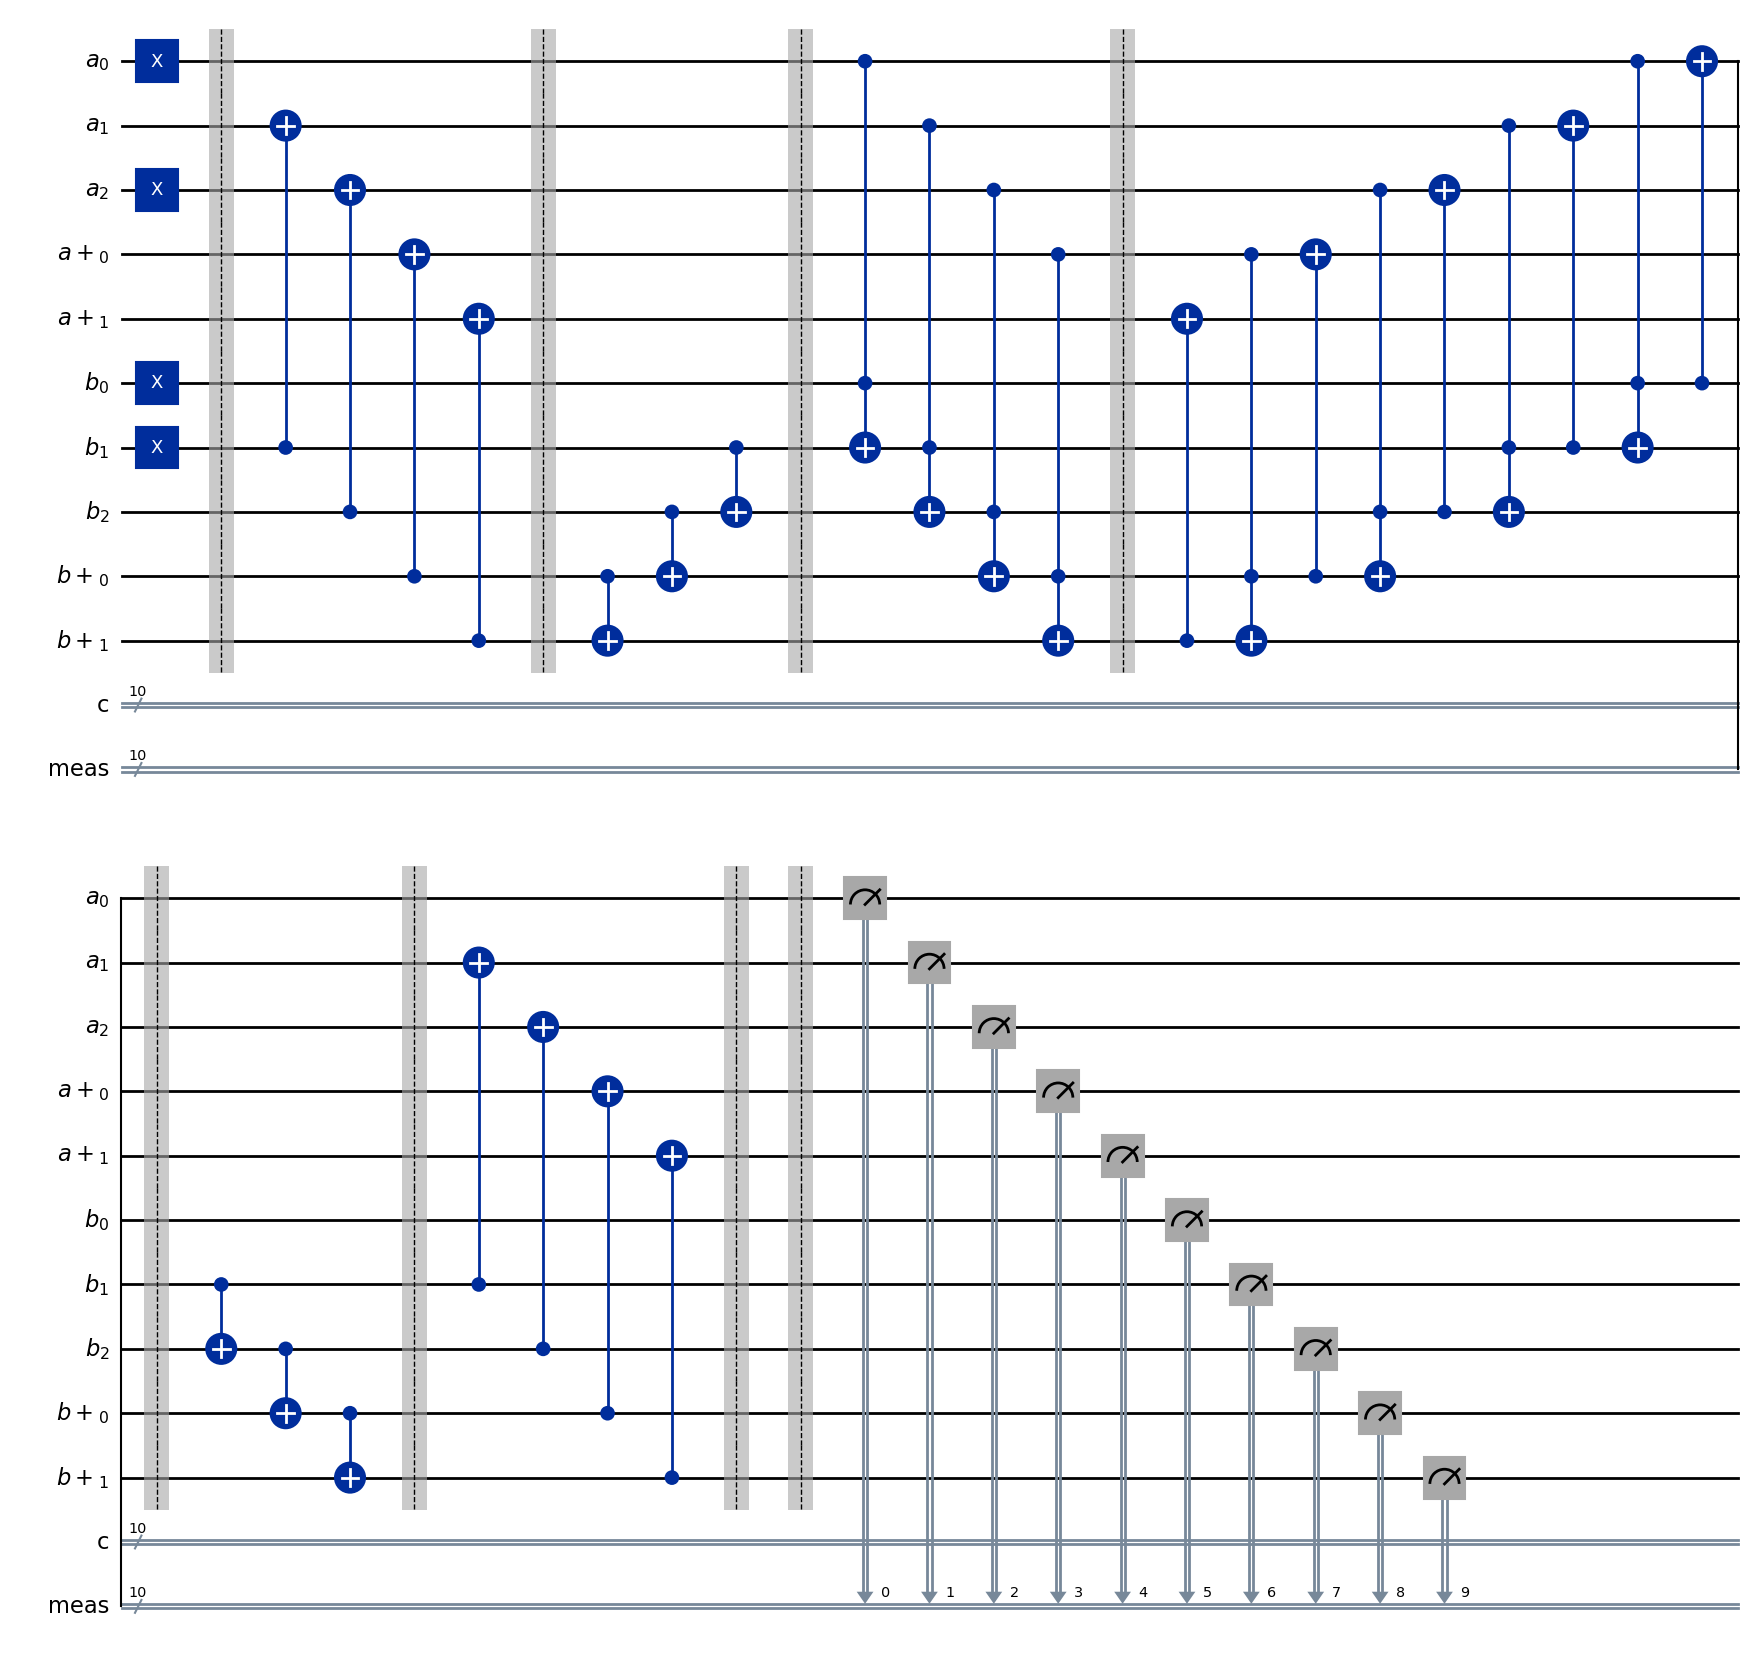

In [245]:
a = QuantumRegister(3, "a") # |101>  # 5
b = QuantumRegister(3,"b")  # |011>  # 3
a_axu=QuantumRegister(2,"a+")
b_axu=QuantumRegister(2,"b+")
c = ClassicalRegister(10,"c")
mat = QuantumCircuit(a,a_axu,b,b_axu,c)

mat.x(a[2])
mat.x(a[0])

mat.x(b[0])
mat.x(b[1])
mat.barrier()
# quantum encoding

# adder
for i in range(1,5):
    mat.cx(i+5,i)
mat.barrier()
for i in range(8,5,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i+5)
mat.barrier()
mat.cx(4+5,4)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i+5)
    mat.cx(i+4,i-1)

mat.barrier()
for i in range(7,10):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i+5,i)
mat.barrier()
'''
# Shift
mat.cx(b_axu[1],b_axu[0])
mat.swap(b_axu[0],b[2])
for i in range(2,0,-1):
    mat.swap(b[i],b[i-1])
mat.barrier()

#Subtractor
mat.x(a)
mat.x(a_axu)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
for i in range(3,0,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i)
mat.barrier()
mat.cx(4,4+5)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i)
    mat.cx(i-1,i+4)
mat.barrier()
for i in range(2,5):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
mat.x(a)
mat.x(a_axu)
mat.x(b)
mat.x(b_axu)
'''
mat.measure_all()
mat.draw('mpl')

In [246]:
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_mat = transpile(mat, simulator)
result_mat = simulator.run(compiled_mat, shots=10000).result()

result_mat.get_counts()
# |101> - |011>  
# pred = |01000> , |00010>

{'0001101000 0000000000': 10000}

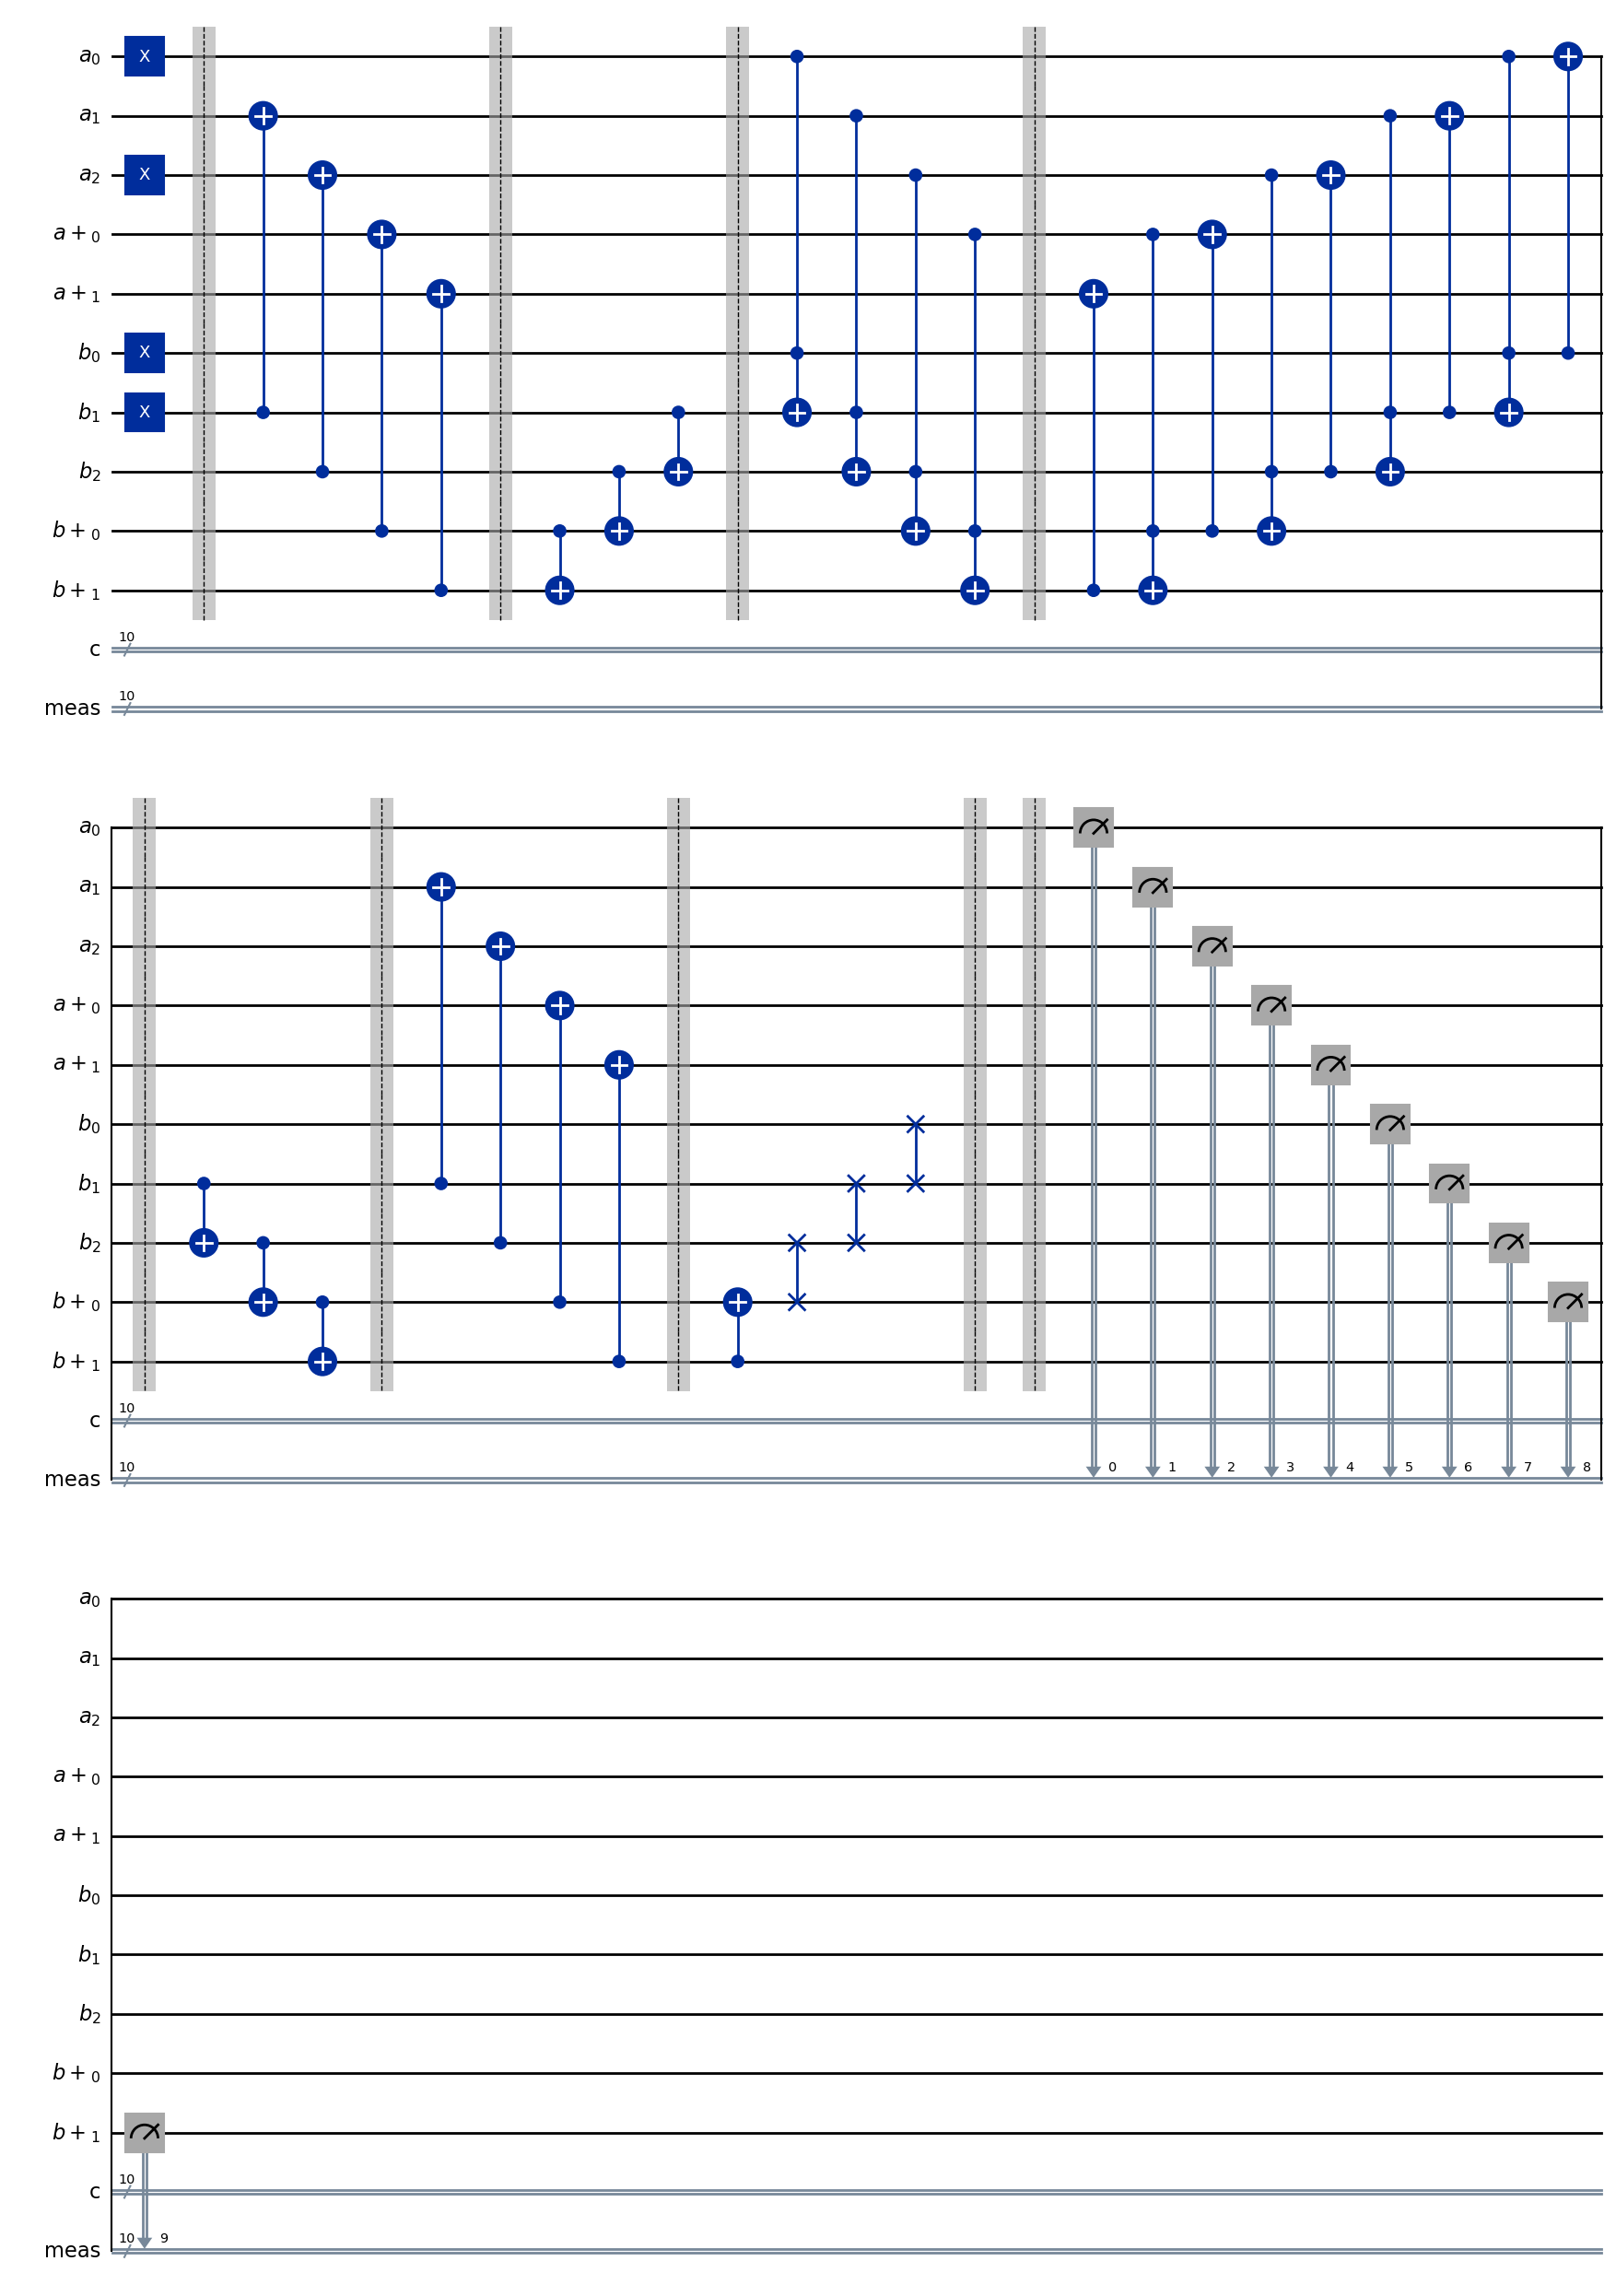

In [247]:
a = QuantumRegister(3, "a") # |101>  # 5
b = QuantumRegister(3,"b")  # |011>  # 3
a_axu=QuantumRegister(2,"a+")
b_axu=QuantumRegister(2,"b+")
c = ClassicalRegister(10,"c")
mat = QuantumCircuit(a,a_axu,b,b_axu,c)

mat.x(a[2])
mat.x(a[0])

mat.x(b[0])
mat.x(b[1])
mat.barrier()
# quantum encoding

# adder
for i in range(1,5):
    mat.cx(i+5,i)
mat.barrier()
for i in range(8,5,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i+5)
mat.barrier()
mat.cx(4+5,4)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i+5)
    mat.cx(i+4,i-1)

mat.barrier()
for i in range(7,10):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i+5,i)
mat.barrier()

# Shift
mat.cx(b_axu[1],b_axu[0])
mat.swap(b_axu[0],b[2])
for i in range(2,0,-1):
    mat.swap(b[i],b[i-1])
mat.barrier()
'''
#Subtractor
mat.x(a)
mat.x(a_axu)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
for i in range(3,0,-1):
    mat.cx(i,i+1)
mat.barrier()
for i in range(1,5):
    mat.ccx(i-1,i+4,i)
mat.barrier()
mat.cx(4,4+5)
for i in range(4,0,-1):      # Peres gate implementation
    mat.ccx(i-1,i+4,i)
    mat.cx(i-1,i+4)
mat.barrier()
for i in range(2,5):
    mat.cx(i-1,i)
mat.barrier()
for i in range(1,5):
    mat.cx(i,i+5)
mat.barrier()
mat.x(a)
mat.x(a_axu)
mat.x(b)
mat.x(b_axu)
'''
mat.measure_all()
mat.draw('mpl')

In [248]:
simulator = Aer.get_backend("qasm_simulator")

# 첫 번째 회로 실행
compiled_mat = transpile(mat, simulator)
result_mat = simulator.run(compiled_mat, shots=10000).result()

result_mat.get_counts()
# |101> - |011>  
# pred = |01000> , |00010>

{'0011001000 0000000000': 10000}

# NEQR

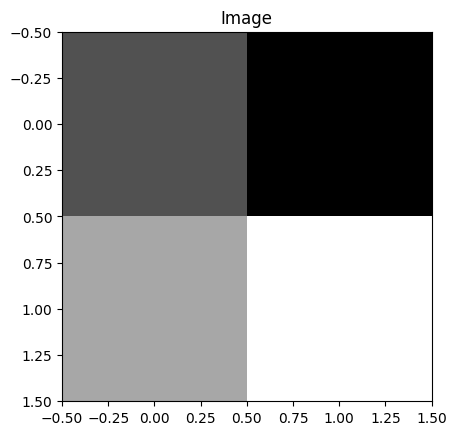

In [249]:
import math 

image = np.random.uniform(low=0, high=255, size=(2,2)).astype(int)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.show()

w_bits = int(np.ceil(math.log(image.shape[1],2)))
h_bits = int(np.ceil(math.log(image.shape[0],2)))
if not w_bits: w_bits = 1
if not h_bits: h_bits = 1

In [250]:
image

array([[125, 101],
       [150, 176]])

In [251]:
indx = QuantumRegister(w_bits+h_bits, 'indx')
intensity = QuantumRegister(8,'intensity')
#cr = ClassicalRegister(len(indx)+len(intensity), 'cr')
qc_image = QuantumCircuit(intensity, indx, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
print(input_im)
qc_image.id(intensity)
qc_image.h(indx)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(len(intensity))
    position = "{0:b}".format(i).zfill(len(indx))
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            control_qubits = list(range(intensity.size, intensity.size + indx.size))
            target_qubit = intensity[idx]
            qc_image.mcx(control_qubits, target_qubit)
    if i!=len(input_im) - 1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
#qc_image.measure(range(qc_image.num_qubits),range(cr.size))

[125 101 150 176]


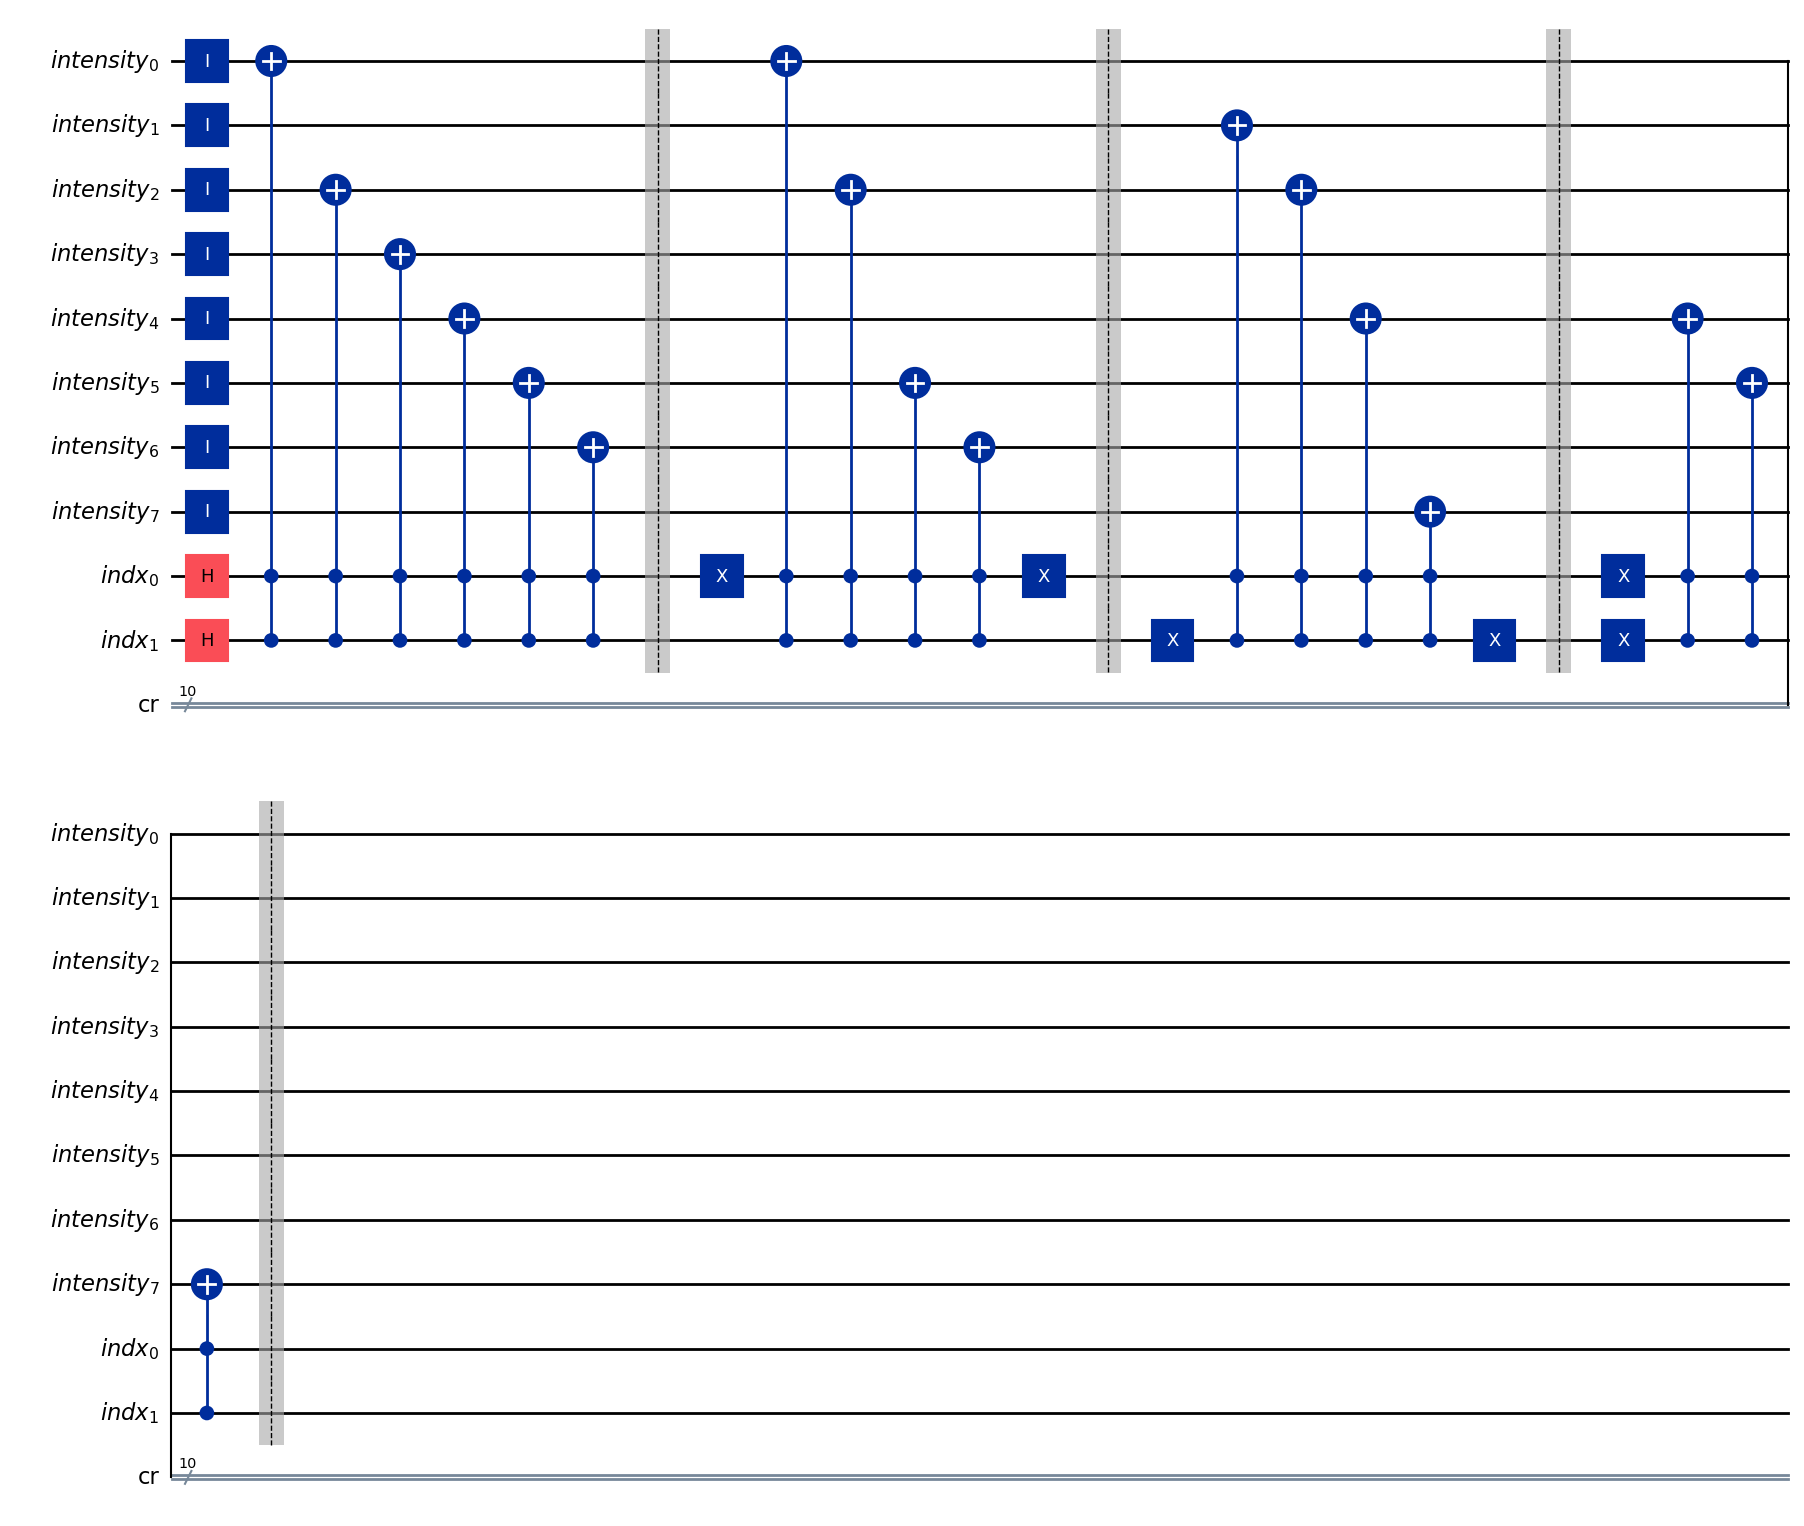

In [252]:
qc_image.draw('mpl')

In [253]:
state_image = Statevector(qc_image)
state_image

Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [254]:
kernel = np.array([[0,0],[0,1]])
input_kernel = kernel.copy().flatten()

indx = QuantumRegister(w_bits+h_bits, 'indx')
intensity = QuantumRegister(8,'intensity')
#cr = ClassicalRegister(len(indx)+len(intensity), 'cr')
qc_kernel = QuantumCircuit(intensity, indx, cr)

print(input_kernel)
qc_kernel.id(intensity)
qc_kernel.h(indx)
for i, pixel in enumerate(input_kernel):
    pixel_bin = "{0:b}".format(pixel).zfill(len(intensity))
    position = "{0:b}".format(i).zfill(len(indx))
    for j, coord in enumerate(position):
        if int(coord):
            qc_kernel.x(qc_kernel.num_qubits-j-1)
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            control_qubits = list(range(intensity.size, intensity.size + indx.size))
            target_qubit = intensity[idx]
            qc_kernel.mcx(control_qubits, target_qubit)
    if i!=len(input_im) - 1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_kernel.x(qc_kernel.num_qubits-j-1)
    qc_kernel.barrier()
#qc_kernel.measure(range(qc_kernel.num_qubits),range(cr.size))

[0 0 0 1]


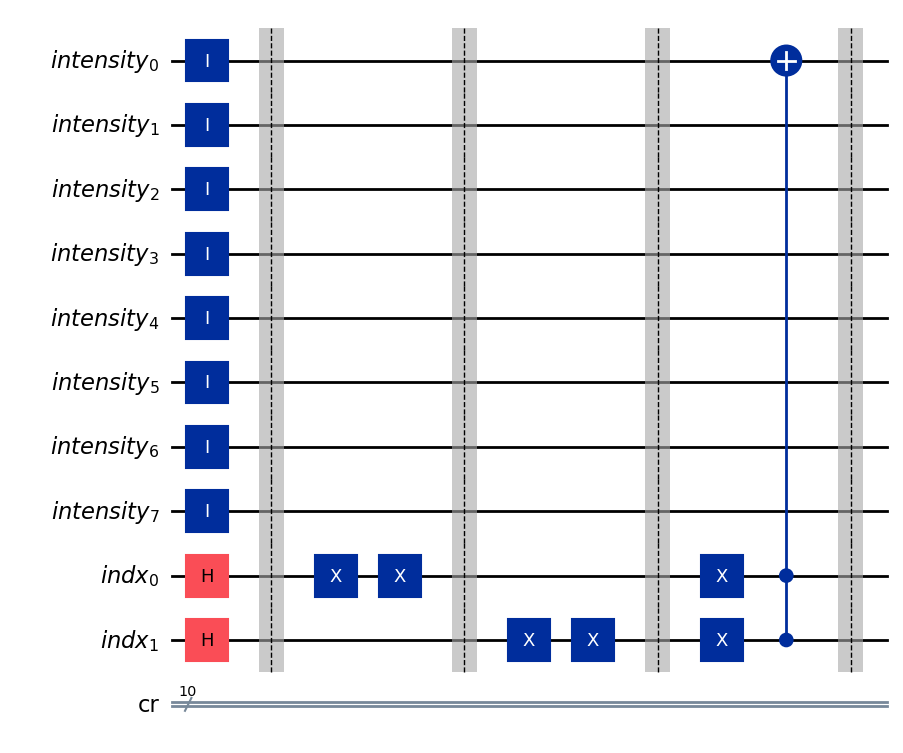

In [255]:
qc_kernel.draw('mpl')

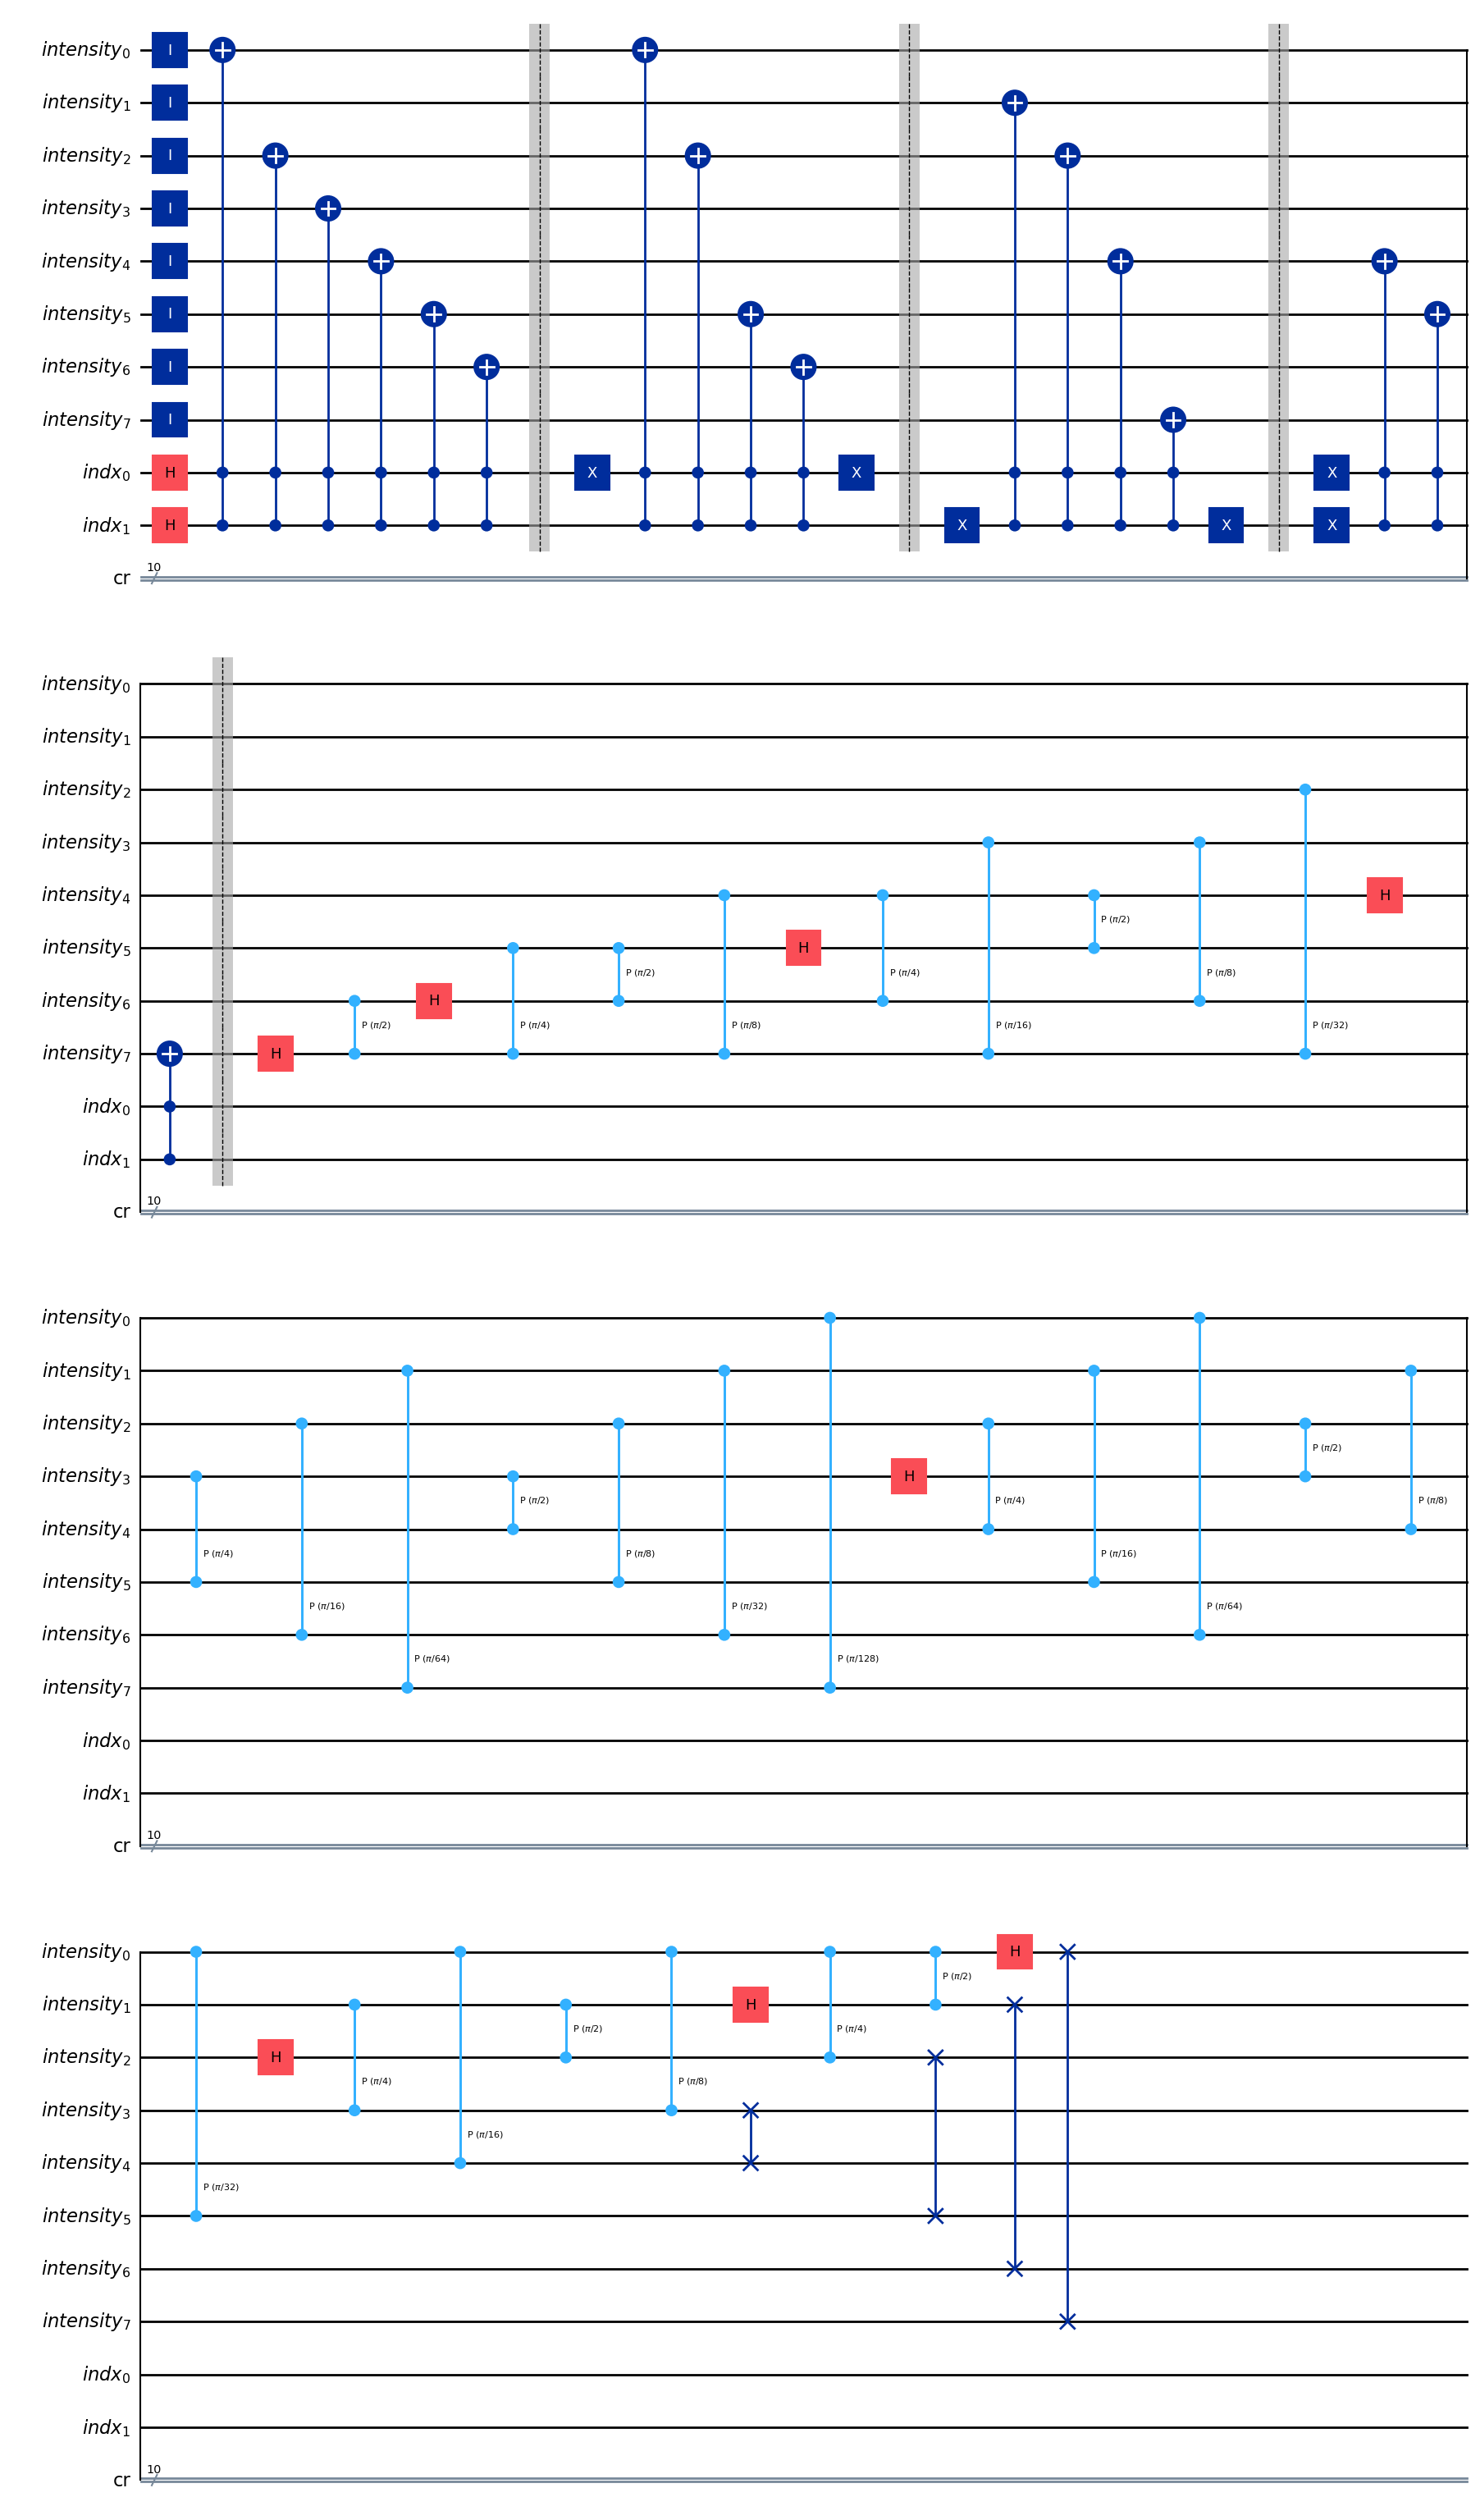

In [256]:
qft_circuit = QFT(num_qubits=8).decompose()  # Create and decompose QFT for 2 qubits
qc_image_qft = qc_image.compose(qft_circuit,qubits=[0,1,2,3,4,5,6,7])
qc_image_qft.draw('mpl')

In [257]:
qc_kernel_qft = qc_kernel.compose(qft_circuit,qubits=[0,1,2,3,4,5,6,7])
#qc_kernel_qft.draw('mpl')

In [258]:
sv_image = Statevector.from_instruction(qc_image)
sv_image_qft= Statevector.from_instruction(qc_image_qft)
sv_kernel = Statevector.from_instruction(qc_kernel)
sv_kernel_qft = Statevector.from_instruction(qc_kernel_qft)

In [259]:
rounded_sv_frqi_qft = np.round(sv_image_qft, 3)
rounded_sv_kernel_qft = np.round(sv_kernel_qft, 3)

#rounded_reordered_sv_frqi_qft = np.round(reordered_sv_frqi_qft, 3)
#rounded_reordered_sv_kernel_qft = np.round(reordered_sv_kernel_qft, 3)

print("FRQI+QFT Statevector:", rounded_sv_frqi_qft)
print("================================================")
print("Kernel+QFT Statevector:", rounded_sv_kernel_qft)

#print("Resorted FRQI+QFT Statevector:", rounded_reordered_sv_frqi_qft)
#print("Resorted Kernel+QFT Statevector:", rounded_reordered_sv_kernel_qft)

FRQI+QFT Statevector: [ 0.031+0.j    -0.031+0.002j  0.031-0.005j ...  0.029-0.012j -0.022-0.022j
 -0.012+0.029j]
Kernel+QFT Statevector: [0.031+0.j    0.031+0.j    0.031+0.j    ... 0.031-0.002j 0.031-0.002j
 0.031-0.001j]


In [260]:
image_qft_vector = np.array(sv_image_qft)
kernel_qft_vector = np.array(sv_kernel_qft)

print(np.round(image_qft_vector, 3),"\n", np.round(kernel_qft_vector, 3))

[ 0.031+0.j    -0.031+0.002j  0.031-0.005j ...  0.029-0.012j -0.022-0.022j
 -0.012+0.029j] 
 [0.031+0.j    0.031+0.j    0.031+0.j    ... 0.031-0.002j 0.031-0.002j
 0.031-0.001j]


In [261]:
element_wise = image_qft_vector *kernel_qft_vector

element_wise_state = Statevector(element_wise)
element_wise_state

Statevector([ 0.00097656+0.00000000e+00j, -0.00097392+7.18403941e-05j,
              0.00096599-1.43291479e-04j, ...,  0.00087229-4.39073564e-04j,
             -0.00072359-6.55819292e-04j, -0.00035146+9.11125780e-04j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [262]:
# element-wise 곱셈 결과 크기가 1이 아니므로 정규화
element_wise_state_norm = element_wise_state / np.linalg.norm(element_wise_state.data)
print("Normalized element-wise multiplication = ","\n",element_wise_state_norm)
sum_of_squares = np.sum(np.abs(element_wise_state_norm) ** 2)
# 제곱근 계산
result = np.sqrt(sum_of_squares)
# 출력
print("size = " ,result)

Normalized element-wise multiplication =  
 Statevector([ 0.03125   +0.j        , -0.03116533+0.00229889j,
              0.03091177-0.00458533j, ...,  0.02791326-0.01405035j,
             -0.02315472-0.02098622j, -0.01124672+0.02915602j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
size =  0.9999999999999999


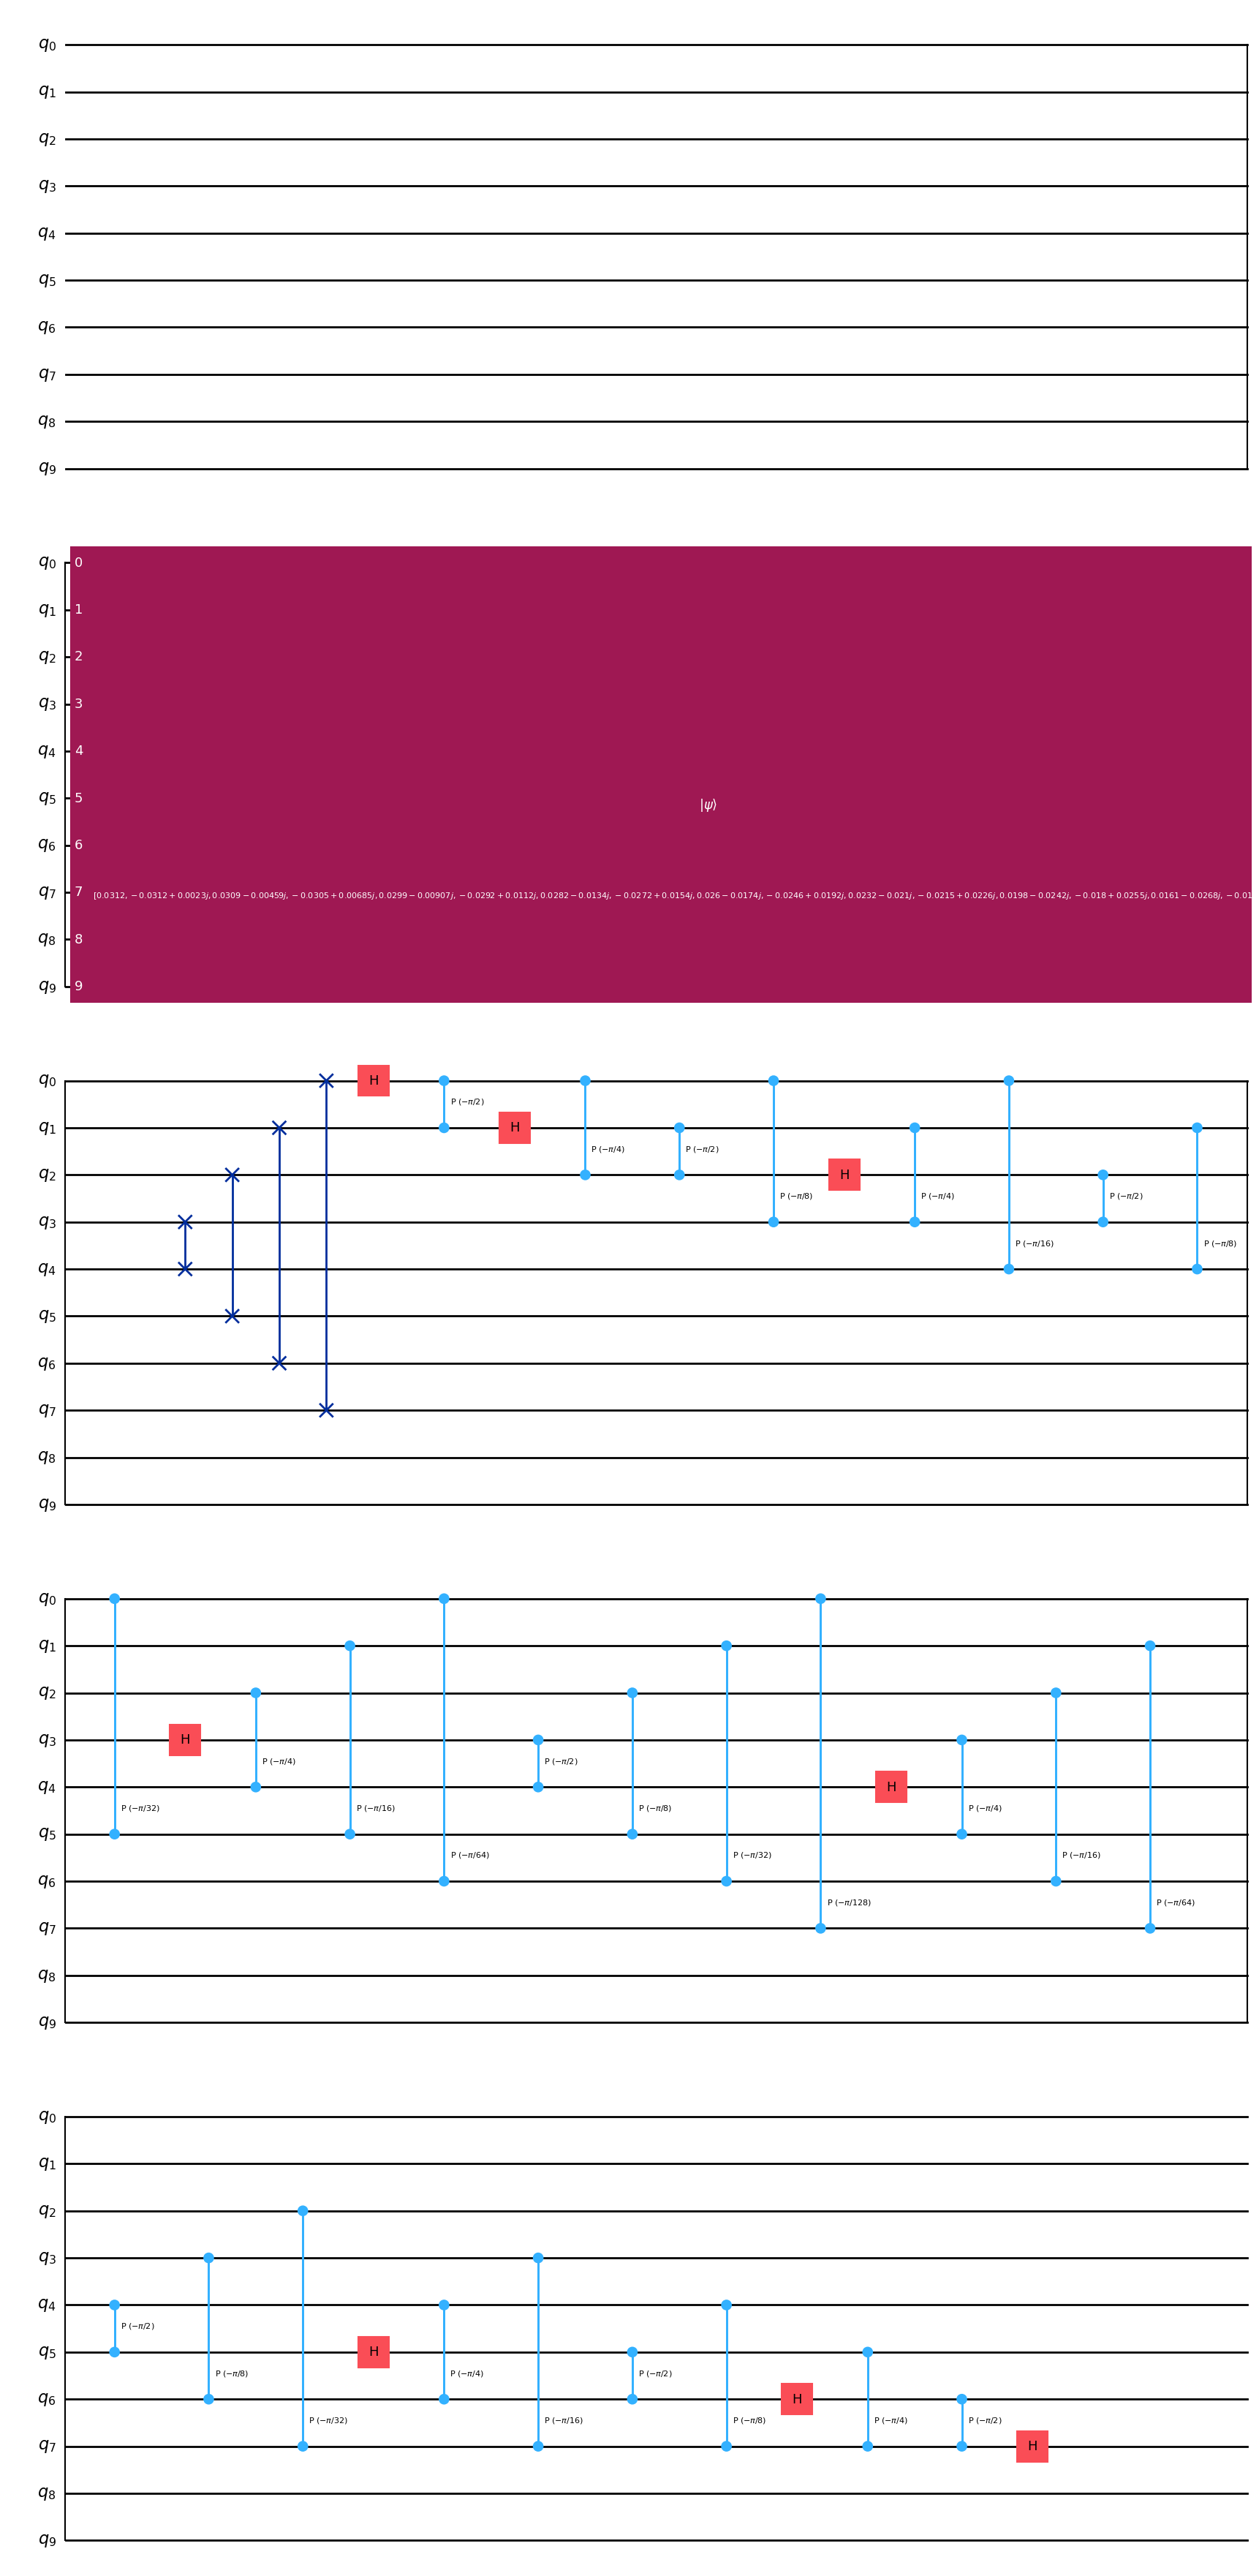

In [263]:
element_wise_qc = QuantumCircuit(10)
element_wise_qc.initialize(element_wise_state_norm)
iqft_circuit=QFT(num_qubits=8, inverse=True).decompose()
element_wise_qc_iqft = element_wise_qc.compose(iqft_circuit,qubits=[0,1,2,3,4,5,6,7])
element_wise_qc_iqft.draw('mpl')

In [264]:
element_wise_qc_iqft_state = Statevector(element_wise_qc_iqft)
print(element_wise_qc_iqft_state)
print("=============================================")
# 모든 항의 절댓값을 제곱한 후 합산
sum_of_squares = np.sum(np.abs(element_wise_qc_iqft_state) ** 2)
# 제곱근 계산
result = np.sqrt(sum_of_squares)
# 출력
print(result)

rounded_iqft = np.round(element_wise_qc_iqft_state, 3)
print("Frequency domain multiplication = ","\n",rounded_iqft)

Statevector([ 1.27679865e-18+1.62212031e-19j,
              2.04820615e-19-5.13286732e-18j,
             -1.00760442e-18-3.84826800e-19j, ...,
              7.39912691e-18+6.99431531e-18j,
              1.70967187e-19-3.46888323e-19j,
              6.76502276e-20+2.71524092e-18j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
0.9999999999999992
Frequency domain multiplication =  
 [ 0.+0.j  0.-0.j -0.-0.j ...  0.+0.j  0.-0.j  0.+0.j]


In [265]:
qc_image.measure(range(qc_image.num_qubits),range(cr.size))

[(2, 150), (0, 125), (1, 101), (3, 176)]


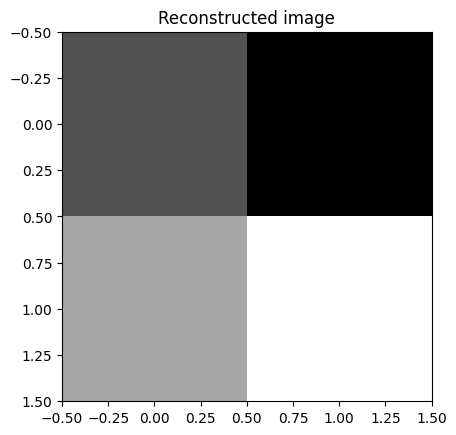

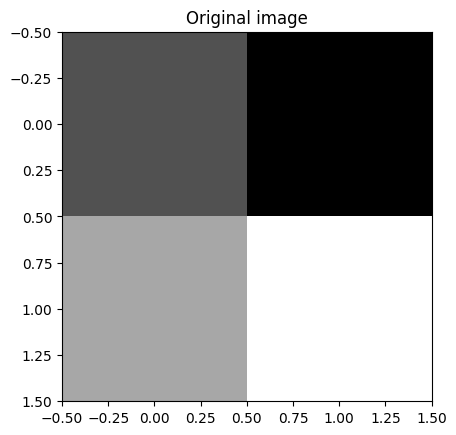

[125. 101. 150. 176.] 
 [125 101 150 176]


In [266]:
compiled_qc1 = transpile(qc_image, simulator)
result = simulator.run(compiled_qc1, shots=10000).result()

counts_neqr = result.get_counts()
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:w_bits+h_bits], 2), int(item[w_bits+h_bits:],2)))
print(out_pixels)
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap='gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.show()
print(out_image.flatten(), '\n', image.flatten())

In [267]:
counts_neqr

{'1010010110': 2434,
 '0001111101': 2595,
 '0101100101': 2517,
 '1110110000': 2454}

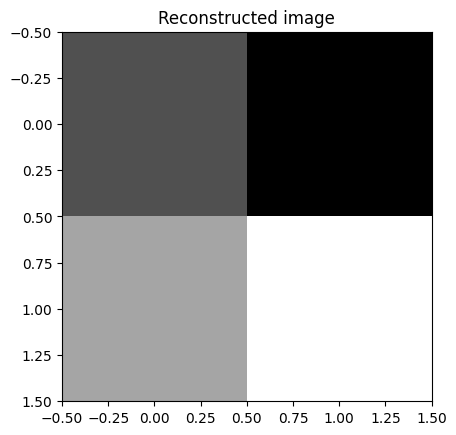

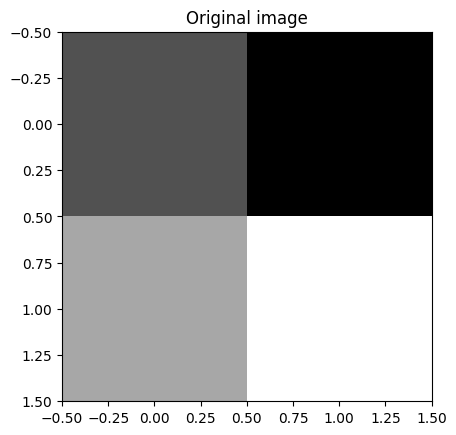

[125. 101. 150. 177.] 
 [125 101 150 176]


In [268]:
element_wise_qc_iqft.measure_all()

compiled_iqft = transpile(element_wise_qc_iqft, simulator)
result_iqft = simulator.run(compiled_iqft, shots=10000).result()

counts_iqft = result_iqft.get_counts()
iqft_pixels = []
for item in counts_iqft:
    iqft_pixels.append((int(item[0:w_bits+h_bits], 2), int(item[w_bits+h_bits:],2)))
out_image_iqft = np.zeros((1, len(input_im)))
for pixel in iqft_pixels:
    out_image_iqft[0][pixel[0]] = pixel[1]
out_image_iqft = np.reshape(out_image_iqft, (image.shape))
plt.imshow(out_image_iqft, cmap='gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.show()
print(out_image_iqft.flatten(), '\n', image.flatten())

In [269]:
counts_iqft

{'0101100101': 2520,
 '1110110001': 2552,
 '1010010110': 2483,
 '0001111101': 2445}

In [270]:
counts_neqr

{'1010010110': 2434,
 '0001111101': 2595,
 '0101100101': 2517,
 '1110110000': 2454}